## Loading the Images

In [1]:
#Loading Libraries
import numpy as np 
import pandas as pd
import numpy as np
import os
import imutils
import dlib 
import cv2 
import imageio
from imutils import face_utils

In [2]:
people = ['F01','F02','F04','F05','F06','F07','F08','F09', 'F10','F11','M01','M02','M04','M07','M08']
data_types = ['words']
folder_enum = ['01','02','03','04','05','06','07','08','09','10']
instances = ['01','02','03','04','05','06','07','08','09','10']

words = ['Begin', 'Choose', 'Connection', 'Navigation', 'Next', 'Previous', 'Start', 'Stop', 'Hello', 'Web']          
words_di = {i:words[i] for i in range(len(words))}

In [3]:
os.listdir('D:/Lipreading/concatenated_images(5x5)')

['F01',
 'F02',
 'F04',
 'F05',
 'F06',
 'F07',
 'F08',
 'F09',
 'F10',
 'F11',
 'M01',
 'M02',
 'M04',
 'M07',
 'M08']

In [4]:
from skimage.transform import resize
import time

In [6]:
import os
import time
import imageio
import numpy as np
from skimage.transform import resize

# Define constants
MAX_WIDTH = 100
MAX_HEIGHT = 100
#max_seq_length = 40  # Updated to match the desired sequence length

t1 = time.time()

UNSEEN_TEST_SPLIT = ['F04','F07', 'M01']

# people1 = ['F01', 'F02', 'F04', 'F05', 'F06', 'F07', 'F08', 'F09', 'F10', 'F11', 'M01', 'M02', 'M04', 'M07', 'M08']
# data_types1 = ['words']
# folder_enum1 = ['01', '02', '03', '04', '05']

X_train, X_test = [], []
y_train, y_test = [], []

directory = "./concatenated_images(5x5)"

for person_id in people:
    tx1 = time.time()
    for data_type in data_types:
        for word_index, word in enumerate(folder_enum):
            print(f"Word : '{words[word_index]}'")
            path = os.path.join(directory, person_id, data_type, word)
            filelist = sorted(os.listdir(path + '/'))
            sequence = []
            print(filelist)
            for img_name in filelist:
                image = imageio.imread(path + '/' + img_name)
                image = resize(image, (MAX_WIDTH, MAX_HEIGHT))
                image = 255 * image
                # Convert to integer data type pixels.
                image = image.astype(np.uint8)
                sequence = image
            # pad_array = [np.zeros((MAX_WIDTH, MAX_HEIGHT))] #* (max_seq_length - len(sequence))
            # sequence.extend(pad_array)  # * (max_seq_length - len(sequence)))
            # # sequence = np.array(sequence)
                if person_id in UNSEEN_TEST_SPLIT:
                    X_test.append(sequence)
                    y_test.append(word_index)
                else:
                    X_train.append(sequence)
                    y_train.append(word_index)
    tx2 = time.time()
    print(f'Finished reading images for person {person_id}. Time taken : {tx2 - tx1} secs.')

t2 = time.time()
print(f"Time taken for creating constant size 3D Tensors from those concatenated lip images : {t2 - t1} secs.")

Word : 'Begin'
['01.jpg', '02.jpg', '03.jpg', '04.jpg', '05.jpg', '06.jpg', '07.jpg', '08.jpg', '09.jpg', '10.jpg']


C:\Users\satvi\AppData\Local\Temp\ipykernel_24548\1648399812.py:36: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(path + '/' + img_name)


Word : 'Choose'
['01.jpg', '02.jpg', '03.jpg', '04.jpg', '05.jpg', '06.jpg', '07.jpg', '08.jpg', '09.jpg', '10.jpg']
Word : 'Connection'
['01.jpg', '02.jpg', '03.jpg', '04.jpg', '05.jpg', '06.jpg', '07.jpg', '08.jpg', '09.jpg', '10.jpg']
Word : 'Navigation'
['01.jpg', '02.jpg', '03.jpg', '04.jpg', '05.jpg', '06.jpg', '07.jpg', '08.jpg', '09.jpg', '10.jpg']
Word : 'Next'
['01.jpg', '02.jpg', '03.jpg', '04.jpg', '05.jpg', '06.jpg', '07.jpg', '08.jpg', '09.jpg', '10.jpg']
Word : 'Previous'
['01.jpg', '02.jpg', '03.jpg', '04.jpg', '05.jpg', '06.jpg', '07.jpg', '08.jpg', '09.jpg', '10.jpg']
Word : 'Start'
['01.jpg', '02.jpg', '03.jpg', '04.jpg', '05.jpg', '06.jpg', '07.jpg', '08.jpg', '09.jpg', '10.jpg']
Word : 'Stop'
['01.jpg', '02.jpg', '03.jpg', '04.jpg', '05.jpg', '06.jpg', '07.jpg', '08.jpg', '09.jpg', '10.jpg']
Word : 'Hello'
['01.jpg', '02.jpg', '03.jpg', '04.jpg', '05.jpg', '06.jpg', '07.jpg', '08.jpg', '09.jpg', '10.jpg']
Word : 'Web'
['01.jpg', '02.jpg', '03.jpg', '04.jpg', '05.jp

In [7]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [8]:
print(X_train.shape)
print(X_test.shape)

(1200, 100, 100)
(300, 100, 100)


In [9]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [10]:
print(y_train.shape)
print(y_test.shape)
print(y_test)

(1200,)
(300,)
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3
 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7
 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 9 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4
 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8
 8 8 8 8 8 9 9 9 9 9 9 9 9 9 9 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2
 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5
 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9
 9 9 9 9]


In [11]:
def normalize_it(X):
    v_min = X.min(axis=(1, 2), keepdims=True)
    v_max = X.max(axis=(1, 2), keepdims=True)

    # Calculate the range and replace zero values with epsilon to avoid division by zero
    range_values = np.where((v_max - v_min) == 0, np.finfo(float).eps, v_max - v_min)

    # Normalize the data
    X_normalized = np.where(range_values == 0, 0, (X - v_min) / range_values)

    return X_normalized

In [12]:
from keras.utils import to_categorical


In [13]:
X_train = normalize_it(X_train)
X_test = normalize_it(X_test)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=0)
X_test, y_test = shuffle(X_test, y_test, random_state=0)

In [14]:
print(y_test)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [15]:
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)

In [16]:
print(X_train.shape)
print(X_test.shape)

(1200, 100, 100, 1)
(300, 100, 100, 1)


In [17]:
print(y_train.shape)
print(y_test.shape)
print(y_test)

(1200, 10)
(300, 10)
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [18]:
df = pd.DataFrame(y_test)
# Display the entire matrix
print(df)


       0    1    2    3    4    5    6    7    8    9
0    1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
2    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3    0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4    0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
295  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
296  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
297  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
298  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
299  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0

[300 rows x 10 columns]


## RESNET

In [19]:
import cv2
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Activation, ZeroPadding3D, TimeDistributed, LSTM, GRU, Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv3D, MaxPooling3D
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, Flatten, Dense, Dropout, Add, Activation
from tensorflow.keras.models import Model


In [20]:
# Define the Residual Block
def residual_block(input_tensor, filters, strides=(1, 1)):
    shortcut = input_tensor

    # First convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=strides, padding='same')(input_tensor)
    x = Activation('relu')(x)

    # Second convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)

    # If dimensions change, adjust shortcut
    if strides != (1, 1) or shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, kernel_size=(1, 1), strides=strides, padding='valid')(shortcut)

    x = Add()([x, shortcut])
    x = Activation('relu')(x)

    return x

# Define the ResNet model
def create_resnet(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, (7, 7), strides=2, activation='relu', padding='same')(inputs)
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Residual blocks
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=128, strides=(2, 2))
    x = residual_block(x, filters=128)
    x = residual_block(x, filters=256, strides=(2, 2))
    x = residual_block(x, filters=256)
    x = residual_block(x, filters=512, strides=(2, 2))
    x = residual_block(x, filters=512)

    x = Flatten()(x)
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(2048, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Create the ResNet model
resnet_model = create_resnet(input_shape=(100, 100, 1), num_classes=10)

# Compile the model
resnet_model.compile(loss='categorical_crossentropy', optimizer='Adagrad', metrics=['accuracy'])

# Print model summary
resnet_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 100, 100, 1)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 50, 50, 64)        │           3,200 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 25, 25, 64)        │               0 │ conv2d[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 25, 25, 64)        │          36,928 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation (Activation)       │ (None, 25, 25, 64)        │               0 │ conv2d_1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 25, 25, 64)        │          36,928 │ activation[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add (Add)                     │ (None, 25, 25, 64)        │               0 │ conv2d_2[0][0],            │
│                               │                           │                 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_1 (Activation)     │ (None, 25, 25, 64)        │               0 │ add[0][0]                  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 25, 25, 64)        │          36,928 │ activation_1[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_2 (Activation)     │ (None, 25, 25, 64)        │               0 │ conv2d_3[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 25, 25, 64)        │          36,928 │ activation_2[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add_1 (Add)                   │ (None, 25, 25, 64)        │               0 │ conv2d_4[0][0],            │
│                               │                           │                 │ activation_1[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_3 (Activation)     │ (None, 25, 25, 64)        │               0 │ add_1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_5 (Conv2D)             │ (None, 13, 13, 128)       │          73,856 │ activation_3[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_4 (Activation)     │ (None, 13, 13, 128)       │               0 │ conv2d_5[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_6 (Conv2D)             │ (None, 13, 13, 128)       │         147,584 │ activation_4[0][0]         │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 55,223,050 (210.66 MB)

 Trainable params: 55,223,050 (210.66 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
t1 = time.time()
history = resnet_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)
t2 = time.time()
print()
print(f"Training time : {t2 - t1} secs.")

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 32s 773ms/step - accuracy: 0.0924 - loss: 2.3104 - val_accuracy: 0.1000 - val_loss: 2.3021
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 29s 753ms/step - accuracy: 0.0930 - loss: 2.3091 - val_accuracy: 0.1000 - val_loss: 2.3014
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 28s 730ms/step - accuracy: 0.1041 - loss: 2.3043 - val_accuracy: 0.1467 - val_loss: 2.3009
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 28s 733ms/step - accuracy: 0.0983 - loss: 2.3026 - val_accuracy: 0.1667 - val_loss: 2.3002
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 27s 721ms/step - accuracy: 0.0847 - loss: 2.3055 - val_accuracy: 0.1633 - val_loss: 2.2996
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 27s 722ms/step - accuracy: 0.0867 - loss: 2.3071 - val_accuracy: 0.1733 - val_loss: 2.2996
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 28s 728ms/step - accuracy: 0.1146 - loss: 2.2992 - val_accuracy: 0.1300 - val_loss: 2.2994
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 27s 720ms/step - accuracy: 0.1393 - loss: 2.2964 - val_accu

In [22]:
# Save the model
model_path = 'resnet/resnet_model.h5'
resnet_model.save(model_path)

ValueError: Unable to synchronously create dataset (name already exists)

## Inception-V3

In [23]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, concatenate, Flatten, Dense, Dropout
from tensorflow.keras.models import Model

# Define the Inception module
def inception_module(x, filters):
    branch1x1 = Conv2D(filters=filters[0], kernel_size=(1, 1), padding='same', activation='relu')(x)

    branch3x3 = Conv2D(filters=filters[1], kernel_size=(1, 1), padding='same', activation='relu')(x)
    branch3x3 = Conv2D(filters=filters[2], kernel_size=(3, 3), padding='same', activation='relu')(branch3x3)

    branch5x5 = Conv2D(filters=filters[3], kernel_size=(1, 1), padding='same', activation='relu')(x)
    branch5x5 = Conv2D(filters=filters[4], kernel_size=(5, 5), padding='same', activation='relu')(branch5x5)

    branch_pool = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)
    branch_pool = Conv2D(filters=filters[5], kernel_size=(1, 1), padding='same', activation='relu')(branch_pool)

    output = concatenate([branch1x1, branch3x3, branch5x5, branch_pool], axis=-1)
    return output

# Define the Inception-V3 model
def create_inception_v3(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # Initial convolutional layer
    x = Conv2D(64, kernel_size=(7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)

    # Inception blocks
    x = inception_module(x, filters=[64, 96, 128, 16, 32, 32])
    x = inception_module(x, filters=[128, 128, 192, 32, 96, 64])
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)

    # Flatten and fully connected layers
    x = Flatten()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)

    # Output layer
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Create the Inception-V3 model
inception_v3_model = create_inception_v3(input_shape=(100, 100, 1), num_classes=10)

# Compile the model
inception_v3_model.compile(loss='categorical_crossentropy', optimizer='Adagrad', metrics=['accuracy'])

# Print model summary
inception_v3_model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 100, 100, 1)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_20 (Conv2D)            │ (None, 50, 50, 64)        │           3,200 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_1               │ (None, 25, 25, 64)        │               0 │ conv2d_20[0][0]            │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_22 (Conv2D)            │ (None, 25, 25, 96)        │           6,240 │ max_pooling2d_1[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_24 (Conv2D)            │ (None, 25, 25, 16)        │           1,040 │ max_pooling2d_1[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_2               │ (None, 25, 25, 64)        │               0 │ max_pooling2d_1[0][0]      │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_21 (Conv2D)            │ (None, 25, 25, 64)        │           4,160 │ max_pooling2d_1[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_23 (Conv2D)            │ (None, 25, 25, 128)       │         110,720 │ conv2d_22[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_25 (Conv2D)            │ (None, 25, 25, 32)        │          12,832 │ conv2d_24[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_26 (Conv2D)            │ (None, 25, 25, 32)        │           2,080 │ max_pooling2d_2[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate (Concatenate)     │ (None, 25, 25, 256)       │               0 │ conv2d_21[0][0],           │
│                               │                           │                 │ conv2d_23[0][0],           │
│                               │                           │                 │ conv2d_25[0][0],           │
│                               │                           │                 │ conv2d_26[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_28 (Conv2D)            │ (None, 25, 25, 128)       │          32,896 │ concatenate[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_30 (Conv2D)            │ (None, 25, 25, 32)        │           8,224 │ concatenate[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_3               │ (None, 25, 25, 256)       │               0 │ concatenate[0][0]          │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 84,126,842 (320.92 MB)

 Trainable params: 84,126,842 (320.92 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
t1 = time.time()
history = inception_v3_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)
t2 = time.time()
print()
print(f"Training time : {t2 - t1} secs.")

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 40s 908ms/step - accuracy: 0.0979 - loss: 2.3052 - val_accuracy: 0.1000 - val_loss: 2.3000
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 34s 886ms/step - accuracy: 0.1017 - loss: 2.3037 - val_accuracy: 0.1367 - val_loss: 2.2995
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 35s 917ms/step - accuracy: 0.1221 - loss: 2.3003 - val_accuracy: 0.1267 - val_loss: 2.2984
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 34s 882ms/step - accuracy: 0.1032 - loss: 2.3003 - val_accuracy: 0.1233 - val_loss: 2.2975
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 33s 881ms/step - accuracy: 0.1140 - loss: 2.2970 - val_accuracy: 0.1633 - val_loss: 2.2959
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 34s 883ms/step - accuracy: 0.1135 - loss: 2.2985 - val_accuracy: 0.1167 - val_loss: 2.2956
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 34s 901ms/step - accuracy: 0.1165 - loss: 2.2983 - val_accuracy: 0.2100 - val_loss: 2.2943
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 34s 898ms/step - accuracy: 0.1192 - loss: 2.2970 - val_accu

In [25]:
# Save the model
model_path = 'inception_v3/inception_v3_model.h5'
inception_v3_model.save(model_path)
print(f"Model saved to {model_path}")


ValueError: Unable to synchronously create dataset (name already exists)

## VGG-16

In [26]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model

# Define the VGG16 model
def create_vgg16(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    
    # Block 1
    x = Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu')(inputs)
    x = Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
    
    # Block 2
    x = Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
    
    # Block 3
    x = Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
    
    # Block 4
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
    
    # Block 5
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
    
    # Flatten and fully connected layers
    x = Flatten()(x)
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.5)(x)
    
    # Output layer
    outputs = Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Create the VGG16 model
vgg16_model = create_vgg16(input_shape=(100, 100, 1), num_classes=10)

# Compile the model
vgg16_model.compile(loss='categorical_crossentropy', optimizer='Adagrad', metrics=['accuracy'])

# Print model summary
vgg16_model.summary()


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 100, 100, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 100, 100, 64)        │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 100, 100, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 50, 50, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 50, 50, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 25, 25, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 25, 25, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 25, 25, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_40 (Conv2D)                   │ (None, 13, 13, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 13, 13, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_42 (Conv2D)                   │ (None, 13, 13, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_43 (Conv2D)                   │ (None, 7, 7, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_44 (Conv2D)                   │ (None, 7, 7, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_45 (Conv2D)                   │ (None, 7, 7, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4096)                │      33,558,528 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 65,094,346 (248.32 MB)

 Trainable params: 65,094,346 (248.32 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
t1 = time.time()
history = vgg16_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)
t2 = time.time()
print()
print(f"Training time : {t2 - t1} secs.")

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 108s 3s/step - accuracy: 0.1003 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 109s 3s/step - accuracy: 0.1105 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3025
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 110s 3s/step - accuracy: 0.0862 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3025
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 105s 3s/step - accuracy: 0.1011 - loss: 2.3025 - val_accuracy: 0.1067 - val_loss: 2.3025
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 105s 3s/step - accuracy: 0.0934 - loss: 2.3025 - val_accuracy: 0.1000 - val_loss: 2.3025
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 106s 3s/step - accuracy: 0.1122 - loss: 2.3025 - val_accuracy: 0.1000 - val_loss: 2.3025
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 104s 3s/step - accuracy: 0.1051 - loss: 2.3025 - val_accuracy: 0.1000 - val_loss: 2.3025
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 104s 3s/step - accuracy: 0.0987 - loss: 2.3025 - val_accuracy: 0.1000 - v

In [29]:
# Save the model
model_path = 'vgg_16/vgg16_model.h5'
vgg16_model.save(model_path)

ValueError: Unable to synchronously create dataset (name already exists)

## ResNet+SVM

38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step
Training Accuracy: 100.0 %
Training Precision: 100.0 %
Training Recall: 100.0 %
Training F1 Score: 100.0 %
Testing Accuracy: 44.333333333333336 %
Testing Precision: 50.09065888742376 %
Testing Recall: 44.333333333333336 %
Testing F1 Score: 40.82619762441662 %


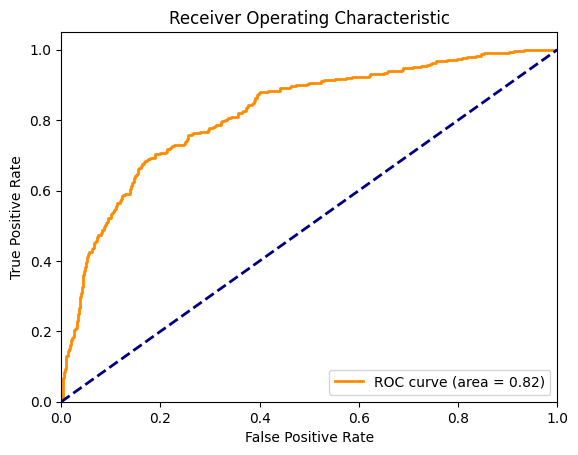

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist # Example dataset
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, Flatten, Dense, Dropout, Activation, Add
from tensorflow.keras.models import Model
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define the Residual Block
def residual_block(input_tensor, filters, strides=(1, 1)):
    shortcut = input_tensor

    # First convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=strides, padding='same')(input_tensor)
    x = Activation('relu')(x)

    # Second convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)

    # If dimensions change, adjust shortcut
    if strides != (1, 1) or shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, kernel_size=(1, 1), strides=strides, padding='valid')(shortcut)

    x = Add()([x, shortcut])
    x = Activation('relu')(x)

    return x

# Define the ResNet model without the last layer
def create_resnet_base(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, (7, 7), strides=2, activation='relu', padding='same')(inputs)
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Residual blocks
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=128, strides=(2, 2))
    x = residual_block(x, filters=128)
    x = residual_block(x, filters=256, strides=(2, 2))
    x = residual_block(x, filters=256)
    x = residual_block(x, filters=512, strides=(2, 2))
    x = residual_block(x, filters=512)

    x = Flatten()(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create the ResNet base model
resnet_base_model = create_resnet_base(input_shape=(100, 100, 1))

# Extract features
X_train_features = resnet_base_model.predict(X_train)
X_test_features = resnet_base_model.predict(X_test)

# Train SVM classifier
svm_classifier = SVC(kernel='linear')
pipeline1 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_classifier", svm_classifier)
])
pipeline1.fit(X_train_features, np.argmax(y_train, axis=1))

# Evaluate performance on training set
y_train_pred = pipeline1.predict(X_train_features)
train_accuracy = accuracy_score(np.argmax(y_train, axis=1), y_train_pred)
train_precision = precision_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_recall = recall_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_f1 = f1_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')

print("Training Accuracy:", train_accuracy*100,'%')
print("Training Precision:", train_precision*100,'%')
print("Training Recall:", train_recall*100,'%')
print("Training F1 Score:", train_f1*100,'%')

# Evaluate performance on testing set
y_test_pred = pipeline1.predict(X_test_features)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_test_pred)
test_precision = precision_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_recall = recall_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_f1 = f1_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')

print("Testing Accuracy:", test_accuracy*100,'%')
print("Testing Precision:", test_precision*100,'%')
print("Testing Recall:", test_recall*100,'%')
print("Testing F1 Score:", test_f1*100,'%')

# ROC curve
y_score = pipeline1.decision_function(X_test_features)
fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())  # Flatten y_test and y_score
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [35]:
import joblib

model_path1 = "model_1/resnet_base_model.h5"
classifier_path1 = "model_1/svm_classifier.pkl"

# Save the ResNet base model
resnet_base_model.save(model_path1)

# Save the SVM classifier
joblib.dump(pipeline1, classifier_path1)

['model_1/svm_classifier.pkl']

## Inception-V3+SVM

38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step
Training Accuracy: 100.0 %
Training Precision: 100.0 %
Training Recall: 100.0 %
Training F1 Score: 100.0 %
Testing Accuracy: 39.33333333333333 %
Testing Precision: 48.48068216563643 %
Testing Recall: 39.33333333333333 %
Testing F1 Score: 37.69134158409753 %


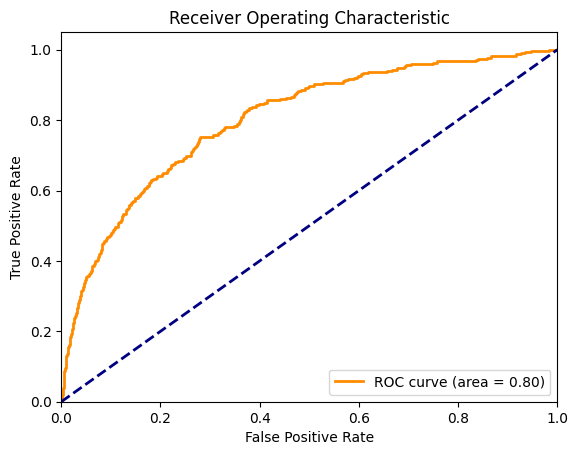

In [38]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, concatenate, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define the Inception module
def inception_module(x, filters):
    branch1x1 = Conv2D(filters=filters[0], kernel_size=(1, 1), padding='same', activation='relu')(x)

    branch3x3 = Conv2D(filters=filters[1], kernel_size=(1, 1), padding='same', activation='relu')(x)
    branch3x3 = Conv2D(filters=filters[2], kernel_size=(3, 3), padding='same', activation='relu')(branch3x3)

    branch5x5 = Conv2D(filters=filters[3], kernel_size=(1, 1), padding='same', activation='relu')(x)
    branch5x5 = Conv2D(filters=filters[4], kernel_size=(5, 5), padding='same', activation='relu')(branch5x5)

    branch_pool = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)
    branch_pool = Conv2D(filters=filters[5], kernel_size=(1, 1), padding='same', activation='relu')(branch_pool)

    output = concatenate([branch1x1, branch3x3, branch5x5, branch_pool], axis=-1)
    return output

# Define the Inception-V3 model without the last layer
def create_inception_v3_base(input_shape):
    inputs = Input(shape=input_shape)

    # Initial convolutional layer
    x = Conv2D(64, kernel_size=(7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Inception blocks
    x = inception_module(x, filters=[64, 96, 128, 16, 32, 32])
    x = inception_module(x, filters=[128, 128, 192, 32, 96, 64])
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Flatten and fully connected layers
    x = Flatten()(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create the Inception-V3 base model
inception_v3_base_model = create_inception_v3_base(input_shape=(100, 100, 1))

# Extract features
X_train_features = inception_v3_base_model.predict(X_train)
X_test_features = inception_v3_base_model.predict(X_test)

# Train SVM classifier
svm_classifier2 = SVC(kernel='linear')
pipeline2 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_classifier", svm_classifier2)
])
pipeline2.fit(X_train_features, np.argmax(y_train, axis=1))

# Evaluate performance on training set
y_train_pred = pipeline2.predict(X_train_features)
train_accuracy = accuracy_score(np.argmax(y_train, axis=1), y_train_pred)
train_precision = precision_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_recall = recall_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_f1 = f1_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')

print("Training Accuracy:", train_accuracy*100,'%')
print("Training Precision:", train_precision*100,'%')
print("Training Recall:", train_recall*100,'%')
print("Training F1 Score:", train_f1*100,'%')

# Evaluate performance on testing set
y_test_pred = pipeline2.predict(X_test_features)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_test_pred)
test_precision = precision_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_recall = recall_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_f1 = f1_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')

print("Testing Accuracy:", test_accuracy*100,'%')
print("Testing Precision:", test_precision*100,'%')
print("Testing Recall:", test_recall*100,'%')
print("Testing F1 Score:", test_f1*100,'%')

# ROC curve
y_score = pipeline2.decision_function(X_test_features)
fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())  # Flatten y_test and y_score
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [40]:
import joblib

model_path2 = "model_2/inception_v3_base_model.h5"
classifier_path2 = "model_2/svm_classifier2.pkl"

# Save the ResNet base model
inception_v3_base_model.save(model_path2)

# Save the SVM classifier
joblib.dump(pipeline2, classifier_path2)

['model_2/svm_classifier2.pkl']

## VGG16+SVM

38/38 ━━━━━━━━━━━━━━━━━━━━ 21s 538ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 476ms/step
Training Accuracy: 100.0 %
Training Precision: 100.0 %
Training Recall: 100.0 %
Training F1 Score: 100.0 %
Testing Accuracy: 38.666666666666664 %
Testing Precision: 53.266654980796815 %
Testing Recall: 38.666666666666664 %
Testing F1 Score: 38.10666794462138 %


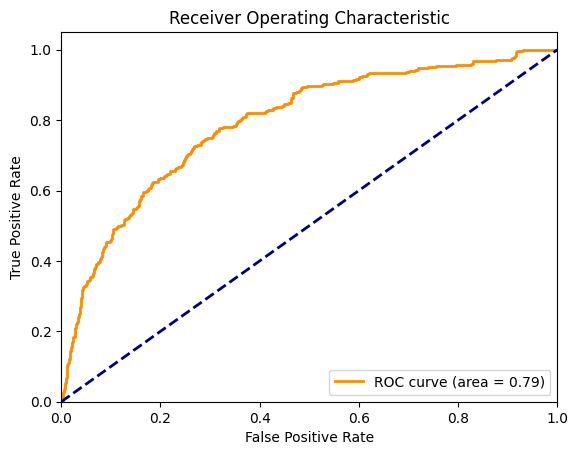

In [138]:
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define the VGG-16 model without the last layer
def create_vgg16_base(input_shape):
    inputs = Input(shape=input_shape)
    
    # Block 1
    x = Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu')(inputs)
    x = Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
    
    # Block 2
    x = Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
    
    # Block 3
    x = Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
    
    # Block 4
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
    
    # Block 5
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
    
    # Flatten and fully connected layers
    x = Flatten()(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create the VGG-16 base model
vgg16_base_model = create_vgg16_base(input_shape=(100, 100, 1))

# Assuming X_train and X_test are already defined and preprocessed
# Extract features
X_train_features = vgg16_base_model.predict(X_train)
X_test_features = vgg16_base_model.predict(X_test)

# Train SVM classifier
svm_classifier3 = SVC(kernel='linear')
pipeline3 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_classifier", svm_classifier3)
])
pipeline3.fit(X_train_features, np.argmax(y_train, axis=1))


# Evaluate performance on training set
y_train_pred = pipeline3.predict(X_train_features)
train_accuracy = accuracy_score(np.argmax(y_train, axis=1), y_train_pred)
train_precision = precision_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_recall = recall_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_f1 = f1_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')

print("Training Accuracy:", train_accuracy*100,'%')
print("Training Precision:", train_precision*100,'%')
print("Training Recall:", train_recall*100,'%')
print("Training F1 Score:", train_f1*100,'%')

# Evaluate performance on testing set
y_test_pred = pipeline3.predict(X_test_features)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_test_pred)
test_precision = precision_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_recall = recall_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_f1 = f1_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')

print("Testing Accuracy:", test_accuracy*100,'%')
print("Testing Precision:", test_precision*100,'%')
print("Testing Recall:", test_recall*100,'%')
print("Testing F1 Score:", test_f1*100,'%')

# ROC curve
y_score = pipeline3.decision_function(X_test_features)
fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())  # Flatten y_test and y_score
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [139]:
import joblib

model_path3 = "model_3/vgg16_base_model.h5"
classifier_path3 = "model_3/svm_classifier3.pkl"

# Save the ResNet base model
vgg16_base_model.save(model_path3)

# Save the SVM classifier
joblib.dump(pipeline3, classifier_path3)

['model_3/svm_classifier3.pkl']

38/38 ━━━━━━━━━━━━━━━━━━━━ 28s 717ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 663ms/step
Training Accuracy: 100.0 %
Training Precision: 100.0 %
Training Recall: 100.0 %
Training F1 Score: 100.0 %
Testing Accuracy: 36.333333333333336 %
Testing Precision: 43.1766158428809 %
Testing Recall: 36.333333333333336 %
Testing F1 Score: 33.85219469223312 %


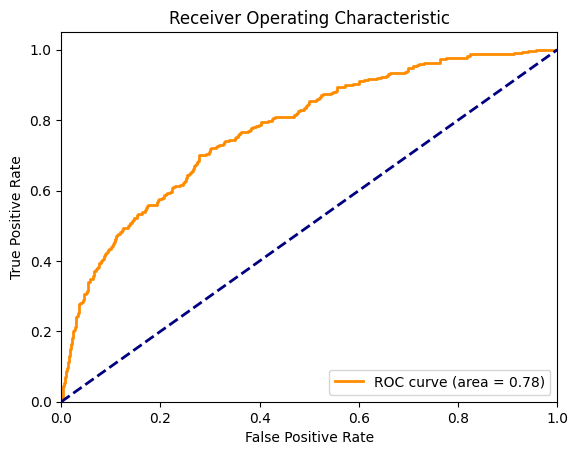

In [45]:
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define the VGG-16 model with Batch Normalization and Dropout
def create_vgg16_base(input_shape):
    inputs = Input(shape=input_shape)
    
    # Block 1
    x = Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
    
    # Block 2
    x = Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
    
    # Block 3
    x = Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
    
    # Block 4
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
    
    # Block 5
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
    
    # Flatten and fully connected layers
    x = Flatten()(x)
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.5)(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create the VGG-16 base model
vgg16_base_model = create_vgg16_base(input_shape=(100, 100, 1))

# Assuming X_train and X_test are already defined and preprocessed
# Extract features
X_train_features = vgg16_base_model.predict(X_train)
X_test_features = vgg16_base_model.predict(X_test)

# Train SVM classifier
svm_classifier4 = SVC(kernel='linear')
pipeline4 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_classifier", svm_classifier4)
])
pipeline4.fit(X_train_features, np.argmax(y_train, axis=1))

# Evaluate performance on training set
y_train_pred = pipeline4.predict(X_train_features)
train_accuracy = accuracy_score(np.argmax(y_train, axis=1), y_train_pred)
train_precision = precision_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_recall = recall_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_f1 = f1_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')

print("Training Accuracy:", train_accuracy*100,'%')
print("Training Precision:", train_precision*100,'%')
print("Training Recall:", train_recall*100,'%')
print("Training F1 Score:", train_f1*100,'%')

# Evaluate performance on testing set
y_test_pred = pipeline4.predict(X_test_features)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_test_pred)
test_precision = precision_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_recall = recall_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_f1 = f1_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')

print("Testing Accuracy:", test_accuracy*100,'%')
print("Testing Precision:", test_precision*100,'%')
print("Testing Recall:", test_recall*100,'%')
print("Testing F1 Score:", test_f1*100,'%')

# ROC curve
y_score = pipeline4.decision_function(X_test_features)
fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())  # Flatten y_test and y_score
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [46]:
import joblib

model_path4 = "model_4/vgg16_base_model.h5"
classifier_path4 = "model_4/svm_classifier4.pkl"

# Save the ResNet base model
vgg16_base_model.save(model_path4)

# Save the SVM classifier
joblib.dump(pipeline4, classifier_path4)

['model_4/svm_classifier4.pkl']

## Resnet+KNN

38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step
Training Accuracy: 79.16666666666666 %
Training Precision: 81.91801315608872 %
Training Recall: 79.16666666666666 %
Training F1 Score: 79.34964404746022 %
Testing Accuracy: 17.0 %
Testing Precision: 19.81967213114754 %
Testing Recall: 17.0 %
Testing F1 Score: 15.682016524740982 %


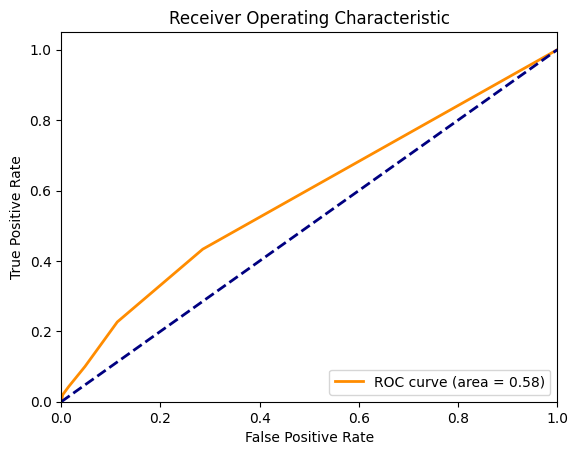

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist # Example dataset
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, Flatten, Dense, Dropout, Activation, Add
from tensorflow.keras.models import Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define the Residual Block
def residual_block(input_tensor, filters, strides=(1, 1)):
    shortcut = input_tensor

    # First convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=strides, padding='same')(input_tensor)
    x = Activation('relu')(x)

    # Second convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)

    # If dimensions change, adjust shortcut
    if strides != (1, 1) or shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, kernel_size=(1, 1), strides=strides, padding='valid')(shortcut)

    x = Add()([x, shortcut])
    x = Activation('relu')(x)

    return x

# Define the ResNet model without the last layer
def create_resnet_base(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, (7, 7), strides=2, activation='relu', padding='same')(inputs)
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Residual blocks
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=128, strides=(2, 2))
    x = residual_block(x, filters=128)
    x = residual_block(x, filters=256, strides=(2, 2))
    x = residual_block(x, filters=256)
    x = residual_block(x, filters=512, strides=(2, 2))
    x = residual_block(x, filters=512)

    x = Flatten()(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create the ResNet base model
resnet_base_model = create_resnet_base(input_shape=(100, 100, 1))

# Extract features
X_train_features = resnet_base_model.predict(X_train)
X_test_features = resnet_base_model.predict(X_test)

# Train KNN classifier
knn_classifier5 = KNeighborsClassifier(n_neighbors=5)
pipeline5 = Pipeline([
    ("scaler", StandardScaler()),
    ("knn_classifier", knn_classifier5)
])
pipeline5.fit(X_train_features, np.argmax(y_train, axis=1))

# Evaluate performance on training set
y_train_pred = pipeline5.predict(X_train_features)
train_accuracy = accuracy_score(np.argmax(y_train, axis=1), y_train_pred)
train_precision = precision_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_recall = recall_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_f1 = f1_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')

print("Training Accuracy:", train_accuracy*100,'%')
print("Training Precision:", train_precision*100,'%')
print("Training Recall:", train_recall*100,'%')
print("Training F1 Score:", train_f1*100,'%')

# Evaluate performance on testing set
y_test_pred = pipeline5.predict(X_test_features)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_test_pred)
test_precision = precision_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_recall = recall_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_f1 = f1_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')

print("Testing Accuracy:", test_accuracy*100,'%')
print("Testing Precision:", test_precision*100,'%')
print("Testing Recall:", test_recall*100,'%')
print("Testing F1 Score:", test_f1*100,'%')

# ROC curve
y_score = pipeline5.predict_proba(X_test_features)
fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())  # Flatten y_test and y_score
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [49]:
import joblib

model_path5 = "model_5/resnet_base_model.h5"
classifier_path5 = "model_5/knn_classifier4.pkl"

# Save the ResNet base model
resnet_base_model.save(model_path5)

# Save the SVM classifier
joblib.dump(pipeline5, classifier_path5)

['model_5/svm_classifier4.pkl']

## Inception-V3+KNN

38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step
Training Accuracy: 78.75 %
Training Precision: 81.27830331720567 %
Training Recall: 78.75 %
Training F1 Score: 78.72260214598185 %
Testing Accuracy: 20.333333333333332 %
Testing Precision: 23.475363521416156 %
Testing Recall: 20.333333333333332 %
Testing F1 Score: 19.477984590951866 %


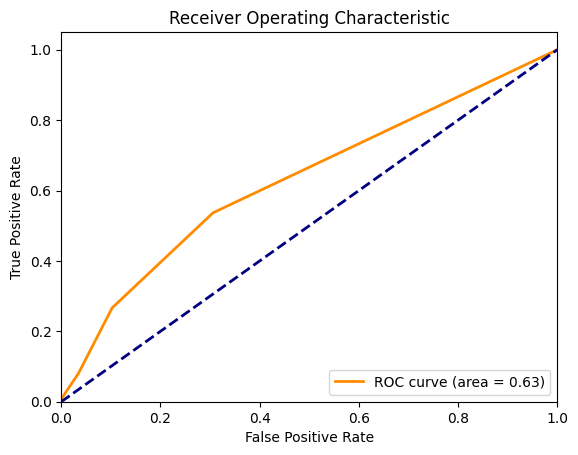

In [51]:
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, concatenate, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define the Inception module
def inception_module(x, filters):
    branch1x1 = Conv2D(filters=filters[0], kernel_size=(1, 1), padding='same', activation='relu')(x)

    branch3x3 = Conv2D(filters=filters[1], kernel_size=(1, 1), padding='same', activation='relu')(x)
    branch3x3 = Conv2D(filters=filters[2], kernel_size=(3, 3), padding='same', activation='relu')(branch3x3)

    branch5x5 = Conv2D(filters=filters[3], kernel_size=(1, 1), padding='same', activation='relu')(x)
    branch5x5 = Conv2D(filters=filters[4], kernel_size=(5, 5), padding='same', activation='relu')(branch5x5)

    branch_pool = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)
    branch_pool = Conv2D(filters=filters[5], kernel_size=(1, 1), padding='same', activation='relu')(branch_pool)

    output = concatenate([branch1x1, branch3x3, branch5x5, branch_pool], axis=-1)
    return output

# Define the Inception-V3 model without the last layer
def create_inception_v3_base(input_shape):
    inputs = Input(shape=input_shape)

    # Initial convolutional layer
    x = Conv2D(64, kernel_size=(7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Inception blocks
    x = inception_module(x, filters=[64, 96, 128, 16, 32, 32])
    x = inception_module(x, filters=[128, 128, 192, 32, 96, 64])
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Flatten and fully connected layers
    x = Flatten()(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create the Inception-V3 base model
inception_v3_base_model = create_inception_v3_base(input_shape=(100, 100, 1))

# Extract features
X_train_features = inception_v3_base_model.predict(X_train)
X_test_features = inception_v3_base_model.predict(X_test)

# Train KNN classifier
knn_classifier6 = KNeighborsClassifier(n_neighbors=5)
pipeline6 = Pipeline([
    ("scaler", StandardScaler()),
    ("knn_classifier", knn_classifier6)
])
pipeline6.fit(X_train_features, np.argmax(y_train, axis=1))

# Evaluate performance on training set
y_train_pred = pipeline6.predict(X_train_features)
train_accuracy = accuracy_score(np.argmax(y_train, axis=1), y_train_pred)
train_precision = precision_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_recall = recall_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_f1 = f1_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')

print("Training Accuracy:", train_accuracy*100,'%')
print("Training Precision:", train_precision*100,'%')
print("Training Recall:", train_recall*100,'%')
print("Training F1 Score:", train_f1*100,'%')

# Evaluate performance on testing set
y_test_pred = pipeline6.predict(X_test_features)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_test_pred)
test_precision = precision_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_recall = recall_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_f1 = f1_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')

print("Testing Accuracy:", test_accuracy*100,'%')
print("Testing Precision:", test_precision*100,'%')
print("Testing Recall:", test_recall*100,'%')
print("Testing F1 Score:", test_f1*100,'%')

# ROC curve
y_score = pipeline6.predict_proba(X_test_features)
fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())  # Flatten y_test and y_score
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [55]:
import joblib

model_path6 = "model_6/inception_v3_base_model.h5"
classifier_path6 = "model_6/knn_classifier6.pkl"

# Save the ResNet base model
inception_v3_base_model.save(model_path6)

# Save the SVM classifier
joblib.dump(pipeline6, classifier_path6)

['model_6/knn_classifier6.pkl']

## VGG-16+KNN

38/38 ━━━━━━━━━━━━━━━━━━━━ 25s 633ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 619ms/step
Training Accuracy: 67.41666666666667 %
Training Precision: 73.75810887390959 %
Training Recall: 67.41666666666667 %
Training F1 Score: 67.41727332570169 %


C:\Users\satvi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Testing Accuracy: 17.333333333333336 %
Testing Precision: 22.42833475776302 %
Testing Recall: 17.333333333333336 %
Testing F1 Score: 15.853274377517398 %


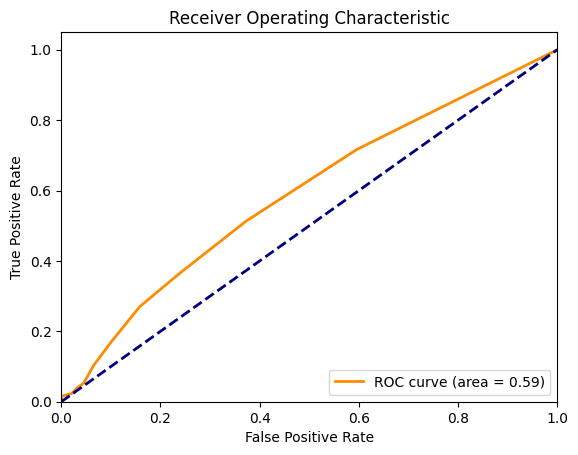

In [53]:
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define the VGG-16 model without the last layer
def create_vgg16_base(input_shape):
    inputs = Input(shape=input_shape)
    
    # Block 1
    x = Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu')(inputs)
    x = Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
    
    # Block 2
    x = Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
    
    # Block 3
    x = Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
    
    # Block 4
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
    
    # Block 5
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
    
    # Flatten and fully connected layers
    x = Flatten()(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create the VGG-16 base model
vgg16_base_model = create_vgg16_base(input_shape=(100, 100, 1))

# Extract features
X_train_features = vgg16_base_model.predict(X_train)
X_test_features = vgg16_base_model.predict(X_test)

# Train KNN classifier
knn_classifier7 = KNeighborsClassifier(n_neighbors=17)
pipeline7 = Pipeline([
    ("scaler", StandardScaler()),
    ("knn_classifier", knn_classifier7)
])
pipeline7.fit(X_train_features, np.argmax(y_train, axis=1))

# Evaluate performance on training set
y_train_pred = pipeline7.predict(X_train_features)
train_accuracy = accuracy_score(np.argmax(y_train, axis=1), y_train_pred)
train_precision = precision_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_recall = recall_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_f1 = f1_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')

print("Training Accuracy:", train_accuracy*100,'%')
print("Training Precision:", train_precision*100,'%')
print("Training Recall:", train_recall*100,'%')
print("Training F1 Score:", train_f1*100,'%')

# Evaluate performance on testing set
y_test_pred = pipeline7.predict(X_test_features)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_test_pred)
test_precision = precision_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_recall = recall_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_f1 = f1_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')

print("Testing Accuracy:", test_accuracy*100,'%')
print("Testing Precision:", test_precision*100,'%')
print("Testing Recall:", test_recall*100,'%')
print("Testing F1 Score:", test_f1*100,'%')

# ROC curve
y_score = pipeline7.predict_proba(X_test_features)
fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())  # Flatten y_test and y_score
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [56]:
import joblib

model_path7 = "model_7/vgg16_base_model.h5"
classifier_path7 = "model_7/knn_classifier7.pkl"

# Save the ResNet base model
vgg16_base_model.save(model_path7)

# Save the SVM classifier
joblib.dump(pipeline7, classifier_path7)

['model_7/knn_classifier7.pkl']

## Resnet+Ada Boost

38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step
Training Accuracy: 35.91666666666667 %
Training Precision: 38.44415541974106 %
Training Recall: 35.91666666666667 %
Training F1 Score: 36.139973131824085 %
Testing Accuracy: 15.0 %
Testing Precision: 16.90078698230872 %
Testing Recall: 15.0 %
Testing F1 Score: 13.965156929055967 %


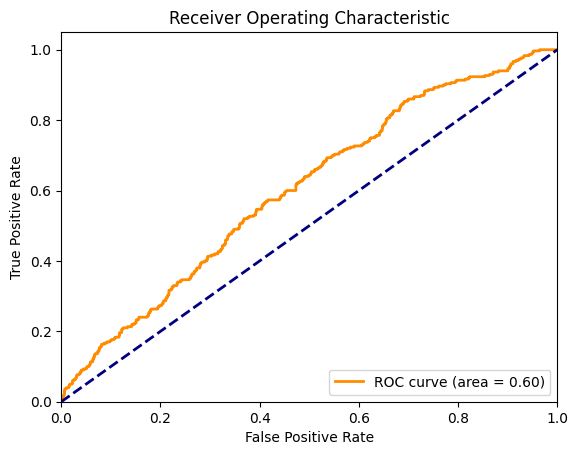

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist # Example dataset
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, Flatten, Dense, Dropout, Activation, Add
from tensorflow.keras.models import Model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define the Residual Block
def residual_block(input_tensor, filters, strides=(1, 1)):
    shortcut = input_tensor

    # First convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=strides, padding='same')(input_tensor)
    x = Activation('relu')(x)

    # Second convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)

    # If dimensions change, adjust shortcut
    if strides != (1, 1) or shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, kernel_size=(1, 1), strides=strides, padding='valid')(shortcut)

    x = Add()([x, shortcut])
    x = Activation('relu')(x)

    return x

# Define the ResNet model without the last layer
def create_resnet_base(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, (7, 7), strides=2, activation='relu', padding='same')(inputs)
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Residual blocks
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=128, strides=(2, 2))
    x = residual_block(x, filters=128)
    x = residual_block(x, filters=256, strides=(2, 2))
    x = residual_block(x, filters=256)
    x = residual_block(x, filters=512, strides=(2, 2))
    x = residual_block(x, filters=512)

    x = Flatten()(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create the ResNet base model
resnet_base_model = create_resnet_base(input_shape=(100, 100, 1))

# Extract features
X_train_features = resnet_base_model.predict(X_train)
X_test_features = resnet_base_model.predict(X_test)

# Train AdaBoost classifier
adaboost_classifier8 = AdaBoostClassifier(n_estimators=80, learning_rate=1.0)
pipeline8 = Pipeline([
    ("scaler", StandardScaler()),
    ("adaboost_classifier", adaboost_classifier8)
])
pipeline8.fit(X_train_features, np.argmax(y_train, axis=1))

# Evaluate performance on training set
y_train_pred = pipeline8.predict(X_train_features)
train_accuracy = accuracy_score(np.argmax(y_train, axis=1), y_train_pred)
train_precision = precision_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_recall = recall_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_f1 = f1_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')

print("Training Accuracy:", train_accuracy*100,'%')
print("Training Precision:", train_precision*100,'%')
print("Training Recall:", train_recall*100,'%')
print("Training F1 Score:", train_f1*100,'%')

# Evaluate performance on testing set
y_test_pred = pipeline8.predict(X_test_features)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_test_pred)
test_precision = precision_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_recall = recall_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_f1 = f1_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')

print("Testing Accuracy:", test_accuracy*100,'%')
print("Testing Precision:", test_precision*100,'%')
print("Testing Recall:", test_recall*100,'%')
print("Testing F1 Score:", test_f1*100,'%')

# ROC curve
y_score = pipeline8.predict_proba(X_test_features)
fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())  # Flatten y_test and y_score
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [59]:
import joblib

model_path8 = "model_8/resnet_base_model.h5"
classifier_path8 = "model_8/ada_boost_classifier8.pkl"

# Save the ResNet base model
resnet_base_model.save(model_path8)

# Save the SVM classifier
joblib.dump(pipeline8, classifier_path8)

['model_8/ada_boost_classifier8.pkl']

38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step
Training Accuracy: 41.75 %
Training Precision: 56.12615124878434 %
Training Recall: 41.75 %
Training F1 Score: 40.192058818491766 %
Testing Accuracy: 20.666666666666668 %
Testing Precision: 36.704845993379436 %
Testing Recall: 20.666666666666668 %
Testing F1 Score: 18.90736309302639 %


C:\Users\satvi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


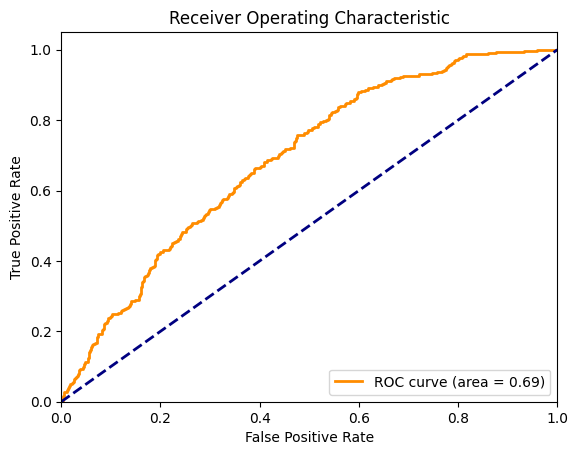

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist # Example dataset
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, Flatten, Dense, Dropout, Activation, Add
from tensorflow.keras.models import Model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define the Residual Block
def residual_block(input_tensor, filters, strides=(1, 1)):
    shortcut = input_tensor

    # First convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=strides, padding='same')(input_tensor)
    x = Activation('relu')(x)

    # Second convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)

    # If dimensions change, adjust shortcut
    if strides != (1, 1) or shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, kernel_size=(1, 1), strides=strides, padding='valid')(shortcut)

    x = Add()([x, shortcut])
    x = Activation('relu')(x)

    return x

# Define the ResNet model without the last layer
def create_resnet_base(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, (7, 7), strides=2, activation='relu', padding='same')(inputs)
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Residual blocks
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=128, strides=(2, 2))
    x = residual_block(x, filters=128)
    x = residual_block(x, filters=256, strides=(2, 2))
    x = residual_block(x, filters=256)
    x = residual_block(x, filters=512, strides=(2, 2))
    x = residual_block(x, filters=512)

    x = Flatten()(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create the ResNet base model
resnet_base_model = create_resnet_base(input_shape=(100, 100, 1))

# Extract features
X_train_features = resnet_base_model.predict(X_train)
X_test_features = resnet_base_model.predict(X_test)

# Train AdaBoost classifier
adaboost_classifier9 = AdaBoostClassifier(n_estimators=100, learning_rate=0.4)
pipeline9 = Pipeline([
    ("scaler", StandardScaler()),
    ("adaboost_classifier", adaboost_classifier9)
])
pipeline9.fit(X_train_features, np.argmax(y_train, axis=1))

# Evaluate performance on training set
y_train_pred = pipeline9.predict(X_train_features)
train_accuracy = accuracy_score(np.argmax(y_train, axis=1), y_train_pred)
train_precision = precision_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_recall = recall_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_f1 = f1_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')

print("Training Accuracy:", train_accuracy*100,'%')
print("Training Precision:", train_precision*100,'%')
print("Training Recall:", train_recall*100,'%')
print("Training F1 Score:", train_f1*100,'%')

# Evaluate performance on testing set
y_test_pred = pipeline9.predict(X_test_features)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_test_pred)
test_precision = precision_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_recall = recall_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_f1 = f1_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')

print("Testing Accuracy:", test_accuracy*100,'%')
print("Testing Precision:", test_precision*100,'%')
print("Testing Recall:", test_recall*100,'%')
print("Testing F1 Score:", test_f1*100,'%')

# ROC curve
y_score = pipeline9.predict_proba(X_test_features)
fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())  # Flatten y_test and y_score
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [62]:
import joblib

model_path9 = "model_9/resnet_base_model.h5"
classifier_path9 = "model_9/ada_boost_classifier9.pkl"

# Save the ResNet base model
resnet_base_model.save(model_path9)

# Save the SVM classifier
joblib.dump(pipeline9, classifier_path9)

['model_9/ada_boost_classifier9.pkl']

38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step
Training Accuracy: 59.0 %
Training Precision: 65.11754109191872 %
Training Recall: 59.0 %
Training F1 Score: 58.75927110619696 %
Testing Accuracy: 20.666666666666668 %
Testing Precision: 37.096025629422314 %
Testing Recall: 20.666666666666668 %
Testing F1 Score: 17.65345053299052 %


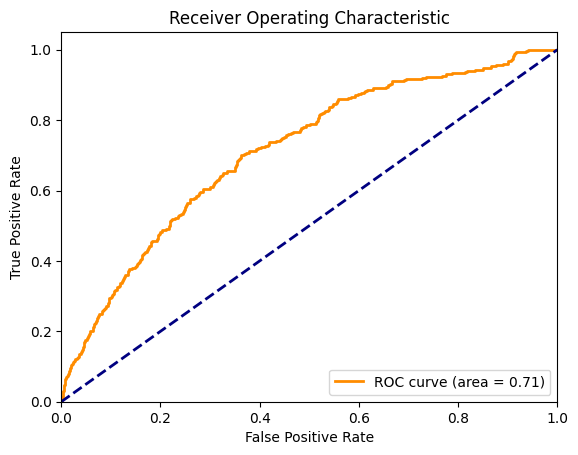

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist # Example dataset
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, Flatten, Dense, Dropout, Activation, Add
from tensorflow.keras.models import Model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define the Residual Block
def residual_block(input_tensor, filters, strides=(1, 1)):
    shortcut = input_tensor

    # First convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=strides, padding='same')(input_tensor)
    x = Activation('relu')(x)

    # Second convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)

    # If dimensions change, adjust shortcut
    if strides != (1, 1) or shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, kernel_size=(1, 1), strides=strides, padding='valid')(shortcut)

    x = Add()([x, shortcut])
    x = Activation('relu')(x)

    return x

# Define the ResNet model without the last layer
def create_resnet_base(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, (7, 7), strides=2, activation='relu', padding='same')(inputs)
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Residual blocks
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=128, strides=(2, 2))
    x = residual_block(x, filters=128)
    x = residual_block(x, filters=256, strides=(2, 2))
    x = residual_block(x, filters=256)
    x = residual_block(x, filters=512, strides=(2, 2))
    x = residual_block(x, filters=512)

    x = Flatten()(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create the ResNet base model
resnet_base_model = create_resnet_base(input_shape=(100, 100, 1))

# Extract features
X_train_features = resnet_base_model.predict(X_train)
X_test_features = resnet_base_model.predict(X_test)

# Train AdaBoost classifier
adaboost_classifier10 = AdaBoostClassifier(n_estimators=500, learning_rate=0.05)
pipeline10 = Pipeline([
    ("scaler", StandardScaler()),
    ("adaboost_classifier", adaboost_classifier10)
])
pipeline10.fit(X_train_features, np.argmax(y_train, axis=1))

# Evaluate performance on training set
y_train_pred = pipeline10.predict(X_train_features)
train_accuracy = accuracy_score(np.argmax(y_train, axis=1), y_train_pred)
train_precision = precision_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_recall = recall_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_f1 = f1_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')

print("Training Accuracy:", train_accuracy*100,'%')
print("Training Precision:", train_precision*100,'%')
print("Training Recall:", train_recall*100,'%')
print("Training F1 Score:", train_f1*100,'%')

# Evaluate performance on testing set
y_test_pred = pipeline10.predict(X_test_features)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_test_pred)
test_precision = precision_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_recall = recall_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_f1 = f1_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')

print("Testing Accuracy:", test_accuracy*100,'%')
print("Testing Precision:", test_precision*100,'%')
print("Testing Recall:", test_recall*100,'%')
print("Testing F1 Score:", test_f1*100,'%')

# ROC curve
y_score = pipeline10.predict_proba(X_test_features)
fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())  # Flatten y_test and y_score
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [66]:
import joblib

model_path10 = "model_10/resnet_base_model.h5"
classifier_path10 = "model_10/ada_boost_classifier10.pkl"

# Save the ResNet base model
resnet_base_model.save(model_path10)

# Save the SVM classifier
joblib.dump(pipeline10, classifier_path10)

['model_10/ada_boost_classifier10.pkl']

38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step
Training Accuracy: 37.916666666666664 %
Training Precision: 39.471687613409614 %
Training Recall: 37.916666666666664 %
Training F1 Score: 37.72155554052734 %
Testing Accuracy: 15.666666666666668 %
Testing Precision: 22.011181800655482 %
Testing Recall: 15.666666666666668 %
Testing F1 Score: 14.054052695020467 %


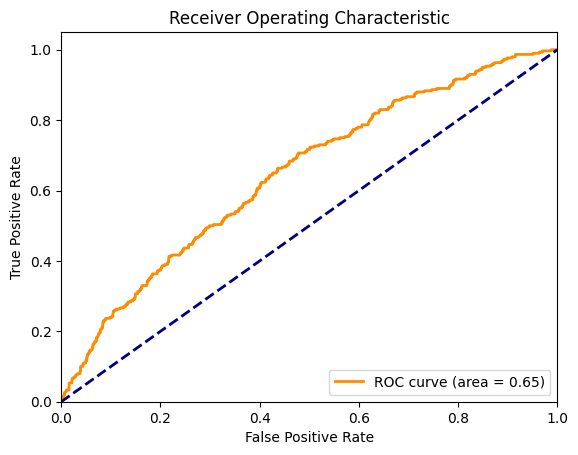

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist # Example dataset
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, Flatten, Dense, Dropout, Activation, Add
from tensorflow.keras.models import Model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define the Residual Block
def residual_block(input_tensor, filters, strides=(1, 1)):
    shortcut = input_tensor

    # First convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=strides, padding='same')(input_tensor)
    x = Activation('relu')(x)

    # Second convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)

    # If dimensions change, adjust shortcut
    if strides != (1, 1) or shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, kernel_size=(1, 1), strides=strides, padding='valid')(shortcut)

    x = Add()([x, shortcut])
    x = Activation('relu')(x)

    return x

# Define the ResNet model without the last layer
def create_resnet_base(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, (7, 7), strides=2, activation='relu', padding='same')(inputs)
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Residual blocks
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=128, strides=(2, 2))
    x = residual_block(x, filters=128)
    x = residual_block(x, filters=256, strides=(2, 2))
    x = residual_block(x, filters=256)
    x = residual_block(x, filters=512, strides=(2, 2))
    x = residual_block(x, filters=512)

    x = Flatten()(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create the ResNet base model
resnet_base_model = create_resnet_base(input_shape=(100, 100, 1))

# Extract features
X_train_features = resnet_base_model.predict(X_train)
X_test_features = resnet_base_model.predict(X_test)

# Train AdaBoost classifier
adaboost_classifier11 = AdaBoostClassifier(n_estimators=150, learning_rate=0.01)
pipeline11 = Pipeline([
    ("scaler", StandardScaler()),
    ("adaboost_classifier", adaboost_classifier11)
])
pipeline11.fit(X_train_features, np.argmax(y_train, axis=1))

# Evaluate performance on training set
y_train_pred = pipeline11.predict(X_train_features)
train_accuracy = accuracy_score(np.argmax(y_train, axis=1), y_train_pred)
train_precision = precision_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_recall = recall_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_f1 = f1_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')

print("Training Accuracy:", train_accuracy*100,'%')
print("Training Precision:", train_precision*100,'%')
print("Training Recall:", train_recall*100,'%')
print("Training F1 Score:", train_f1*100,'%')

# Evaluate performance on testing set
y_test_pred = pipeline11.predict(X_test_features)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_test_pred)
test_precision = precision_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_recall = recall_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_f1 = f1_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')

print("Testing Accuracy:", test_accuracy*100,'%')
print("Testing Precision:", test_precision*100,'%')
print("Testing Recall:", test_recall*100,'%')
print("Testing F1 Score:", test_f1*100,'%')

# ROC curve
y_score = pipeline11.predict_proba(X_test_features)
fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())  # Flatten y_test and y_score
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [69]:
import joblib

model_path11 = "model_11/resnet_base_model.h5"
classifier_path11 = "model_11/ada_boost_classifier11.pkl"

# Save the ResNet base model
resnet_base_model.save(model_path11)

# Save the SVM classifier
joblib.dump(pipeline11, classifier_path11)

['model_11/ada_boost_classifier11.pkl']

38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step


C:\Users\satvi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training Accuracy: 23.083333333333332 %
Training Precision: 19.039256152481016 %
Training Recall: 23.083333333333332 %
Training F1 Score: 17.32618777286539 %


C:\Users\satvi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Testing Accuracy: 15.333333333333332 %
Testing Precision: 21.61831621461486 %
Testing Recall: 15.333333333333332 %
Testing F1 Score: 12.037029893497468 %


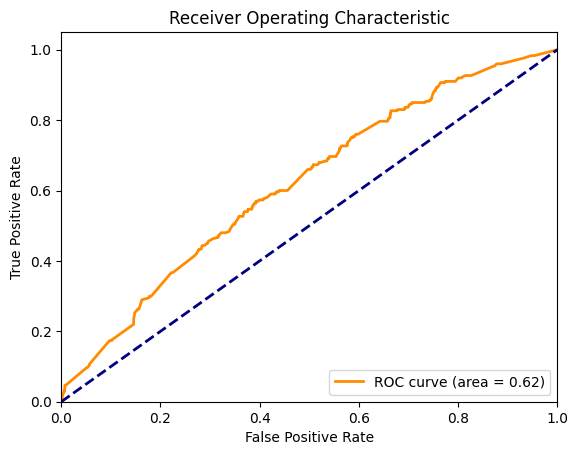

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist # Example dataset
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, Flatten, Dense, Dropout, Activation, Add
from tensorflow.keras.models import Model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define the Residual Block
def residual_block(input_tensor, filters, strides=(1, 1)):
    shortcut = input_tensor

    # First convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=strides, padding='same')(input_tensor)
    x = Activation('relu')(x)

    # Second convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)

    # If dimensions change, adjust shortcut
    if strides != (1, 1) or shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, kernel_size=(1, 1), strides=strides, padding='valid')(shortcut)

    x = Add()([x, shortcut])
    x = Activation('relu')(x)

    return x

# Define the ResNet model without the last layer
def create_resnet_base(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, (7, 7), strides=2, activation='relu', padding='same')(inputs)
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Residual blocks
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=128, strides=(2, 2))
    x = residual_block(x, filters=128)
    x = residual_block(x, filters=256, strides=(2, 2))
    x = residual_block(x, filters=256)
    x = residual_block(x, filters=512, strides=(2, 2))
    x = residual_block(x, filters=512)

    x = Flatten()(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create the ResNet base model
resnet_base_model = create_resnet_base(input_shape=(100, 100, 1))

# Extract features
X_train_features = resnet_base_model.predict(X_train)
X_test_features = resnet_base_model.predict(X_test)

# Train AdaBoost classifier
adaboost_classifier12 = AdaBoostClassifier(n_estimators=200, learning_rate=0.001)
pipeline12 = Pipeline([
    ("scaler", StandardScaler()),
    ("adaboost_classifier", adaboost_classifier12)
])
pipeline12.fit(X_train_features, np.argmax(y_train, axis=1))


# Evaluate performance on training set
y_train_pred = pipeline12.predict(X_train_features)
train_accuracy = accuracy_score(np.argmax(y_train, axis=1), y_train_pred)
train_precision = precision_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_recall = recall_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_f1 = f1_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')

print("Training Accuracy:", train_accuracy*100,'%')
print("Training Precision:", train_precision*100,'%')
print("Training Recall:", train_recall*100,'%')
print("Training F1 Score:", train_f1*100,'%')

# Evaluate performance on testing set
y_test_pred = pipeline12.predict(X_test_features)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_test_pred)
test_precision = precision_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_recall = recall_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_f1 = f1_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')

print("Testing Accuracy:", test_accuracy*100,'%')
print("Testing Precision:", test_precision*100,'%')
print("Testing Recall:", test_recall*100,'%')
print("Testing F1 Score:", test_f1*100,'%')

# ROC curve
y_score = pipeline12.predict_proba(X_test_features)
fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())  # Flatten y_test and y_score
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [73]:
import joblib

model_path12 = "model_12/resnet_base_model.h5"
classifier_path12 = "model_12/ada_boost_classifier12.pkl"

# Save the ResNet base model
resnet_base_model.save(model_path12)

# Save the SVM classifier
joblib.dump(pipeline12, classifier_path12)

['model_12/ada_boost_classifier12.pkl']

## Inception-V3+Ada Boost

38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 150ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step
Training Accuracy: 50.083333333333336 %
Training Precision: 58.03505553892448 %
Training Recall: 50.083333333333336 %
Training F1 Score: 49.86561428424895 %


C:\Users\satvi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Testing Accuracy: 26.0 %
Testing Precision: 28.38705362897105 %
Testing Recall: 26.0 %
Testing F1 Score: 24.787052357351328 %


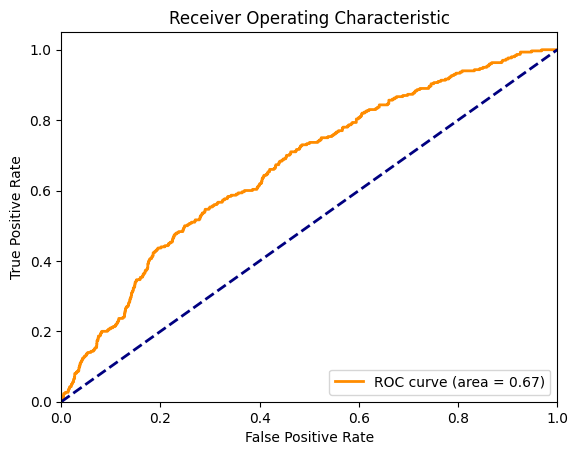

In [74]:
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, concatenate, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define the Inception module
def inception_module(x, filters):
    branch1x1 = Conv2D(filters=filters[0], kernel_size=(1, 1), padding='same', activation='relu')(x)

    branch3x3 = Conv2D(filters=filters[1], kernel_size=(1, 1), padding='same', activation='relu')(x)
    branch3x3 = Conv2D(filters=filters[2], kernel_size=(3, 3), padding='same', activation='relu')(branch3x3)

    branch5x5 = Conv2D(filters=filters[3], kernel_size=(1, 1), padding='same', activation='relu')(x)
    branch5x5 = Conv2D(filters=filters[4], kernel_size=(5, 5), padding='same', activation='relu')(branch5x5)

    branch_pool = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)
    branch_pool = Conv2D(filters=filters[5], kernel_size=(1, 1), padding='same', activation='relu')(branch_pool)

    output = concatenate([branch1x1, branch3x3, branch5x5, branch_pool], axis=-1)
    return output

# Define the Inception-V3 model without the last layer
def create_inception_v3_base(input_shape):
    inputs = Input(shape=input_shape)

    # Initial convolutional layer
    x = Conv2D(64, kernel_size=(7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Inception blocks
    x = inception_module(x, filters=[64, 96, 128, 16, 32, 32])
    x = inception_module(x, filters=[128, 128, 192, 32, 96, 64])
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Flatten and fully connected layers
    x = Flatten()(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create the Inception-V3 base model
inception_v3_base_model = create_inception_v3_base(input_shape=(100, 100, 1))

# Extract features
X_train_features = inception_v3_base_model.predict(X_train)
X_test_features = inception_v3_base_model.predict(X_test)

# Train AdaBoost classifier
adaboost_classifier13 = AdaBoostClassifier(n_estimators=80, learning_rate=0.5)
pipeline13 = Pipeline([
    ("scaler", StandardScaler()),
    ("adaboost_classifier", adaboost_classifier13)
])
pipeline13.fit(X_train_features, np.argmax(y_train, axis=1))

# Evaluate performance on training set
y_train_pred = pipeline13.predict(X_train_features)
train_accuracy = accuracy_score(np.argmax(y_train, axis=1), y_train_pred)
train_precision = precision_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_recall = recall_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_f1 = f1_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')

print("Training Accuracy:", train_accuracy*100,'%')
print("Training Precision:", train_precision*100,'%')
print("Training Recall:", train_recall*100,'%')
print("Training F1 Score:", train_f1*100,'%')

# Evaluate performance on testing set
y_test_pred = pipeline13.predict(X_test_features)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_test_pred)
test_precision = precision_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_recall = recall_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_f1 = f1_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')

print("Testing Accuracy:", test_accuracy*100,'%')
print("Testing Precision:", test_precision*100,'%')
print("Testing Recall:", test_recall*100,'%')
print("Testing F1 Score:", test_f1*100,'%')

# ROC curve
y_score = pipeline13.predict_proba(X_test_features)
fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())  # Flatten y_test and y_score
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [76]:
import joblib

model_path13 = "model_13/inception_v3_base_model.h5"
classifier_path13 = "model_13/ada_boost_classifier13.pkl"

# Save the ResNet base model
inception_v3_base_model.save(model_path13)

# Save the SVM classifier
joblib.dump(pipeline13, classifier_path13)

['model_13/ada_boost_classifier13.pkl']

38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step
Training Accuracy: 45.25 %
Training Precision: 53.46192124201544 %
Training Recall: 45.25 %
Training F1 Score: 44.7930467580579 %
Testing Accuracy: 18.666666666666668 %
Testing Precision: 28.55126683024465 %
Testing Recall: 18.666666666666668 %
Testing F1 Score: 17.72867827232397 %


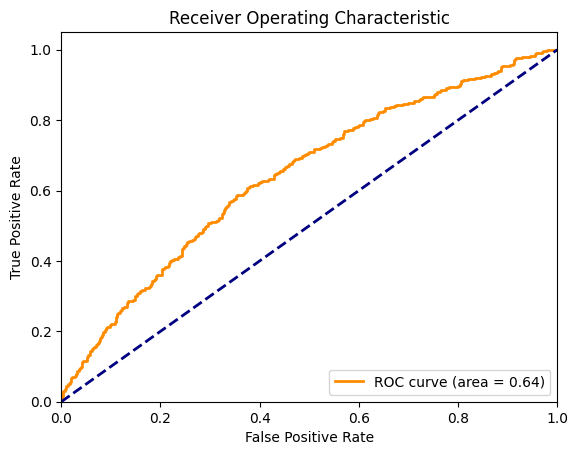

In [77]:
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, concatenate, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define the Inception module
def inception_module(x, filters):
    branch1x1 = Conv2D(filters=filters[0], kernel_size=(1, 1), padding='same', activation='relu')(x)

    branch3x3 = Conv2D(filters=filters[1], kernel_size=(1, 1), padding='same', activation='relu')(x)
    branch3x3 = Conv2D(filters=filters[2], kernel_size=(3, 3), padding='same', activation='relu')(branch3x3)

    branch5x5 = Conv2D(filters=filters[3], kernel_size=(1, 1), padding='same', activation='relu')(x)
    branch5x5 = Conv2D(filters=filters[4], kernel_size=(5, 5), padding='same', activation='relu')(branch5x5)

    branch_pool = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)
    branch_pool = Conv2D(filters=filters[5], kernel_size=(1, 1), padding='same', activation='relu')(branch_pool)

    output = concatenate([branch1x1, branch3x3, branch5x5, branch_pool], axis=-1)
    return output

# Define the Inception-V3 model without the last layer
def create_inception_v3_base(input_shape):
    inputs = Input(shape=input_shape)

    # Initial convolutional layer
    x = Conv2D(64, kernel_size=(7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Inception blocks
    x = inception_module(x, filters=[64, 96, 128, 16, 32, 32])
    x = inception_module(x, filters=[128, 128, 192, 32, 96, 64])
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Flatten and fully connected layers
    x = Flatten()(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create the Inception-V3 base model
inception_v3_base_model = create_inception_v3_base(input_shape=(100, 100, 1))

# Extract features
X_train_features = inception_v3_base_model.predict(X_train)
X_test_features = inception_v3_base_model.predict(X_test)

# Train AdaBoost classifier
adaboost_classifier14 = AdaBoostClassifier(n_estimators=100, learning_rate=0.4)
pipeline14 = Pipeline([
    ("scaler", StandardScaler()),
    ("adaboost_classifier", adaboost_classifier14)
])
pipeline14.fit(X_train_features, np.argmax(y_train, axis=1))


# Evaluate performance on training set
y_train_pred = pipeline14.predict(X_train_features)
train_accuracy = accuracy_score(np.argmax(y_train, axis=1), y_train_pred)
train_precision = precision_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_recall = recall_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_f1 = f1_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')

print("Training Accuracy:", train_accuracy*100,'%')
print("Training Precision:", train_precision*100,'%')
print("Training Recall:", train_recall*100,'%')
print("Training F1 Score:", train_f1*100,'%')

# Evaluate performance on testing set
y_test_pred = pipeline14.predict(X_test_features)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_test_pred)
test_precision = precision_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_recall = recall_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_f1 = f1_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')

print("Testing Accuracy:", test_accuracy*100,'%')
print("Testing Precision:", test_precision*100,'%')
print("Testing Recall:", test_recall*100,'%')
print("Testing F1 Score:", test_f1*100,'%')

# ROC curve
y_score = pipeline14.predict_proba(X_test_features)
fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())  # Flatten y_test and y_score
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [78]:
import joblib

model_path14 = "model_14/inception_v3_base_model.h5"
classifier_path14 = "model_14/ada_boost_classifier14.pkl"

# Save the ResNet base model
inception_v3_base_model.save(model_path14)

# Save the SVM classifier
joblib.dump(pipeline14, classifier_path14)

['model_14/ada_boost_classifier14.pkl']

38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 135ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 147ms/step
Training Accuracy: 54.91666666666667 %
Training Precision: 66.43015969534886 %
Training Recall: 54.91666666666667 %
Training F1 Score: 53.26428936794431 %
Testing Accuracy: 16.333333333333332 %
Testing Precision: 22.711097488267587 %
Testing Recall: 16.333333333333332 %
Testing F1 Score: 14.19942441222854 %


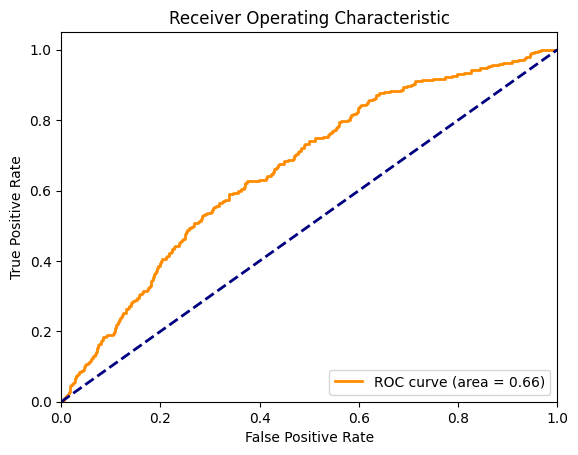

In [80]:
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, concatenate, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define the Inception module
def inception_module(x, filters):
    branch1x1 = Conv2D(filters=filters[0], kernel_size=(1, 1), padding='same', activation='relu')(x)

    branch3x3 = Conv2D(filters=filters[1], kernel_size=(1, 1), padding='same', activation='relu')(x)
    branch3x3 = Conv2D(filters=filters[2], kernel_size=(3, 3), padding='same', activation='relu')(branch3x3)

    branch5x5 = Conv2D(filters=filters[3], kernel_size=(1, 1), padding='same', activation='relu')(x)
    branch5x5 = Conv2D(filters=filters[4], kernel_size=(5, 5), padding='same', activation='relu')(branch5x5)

    branch_pool = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)
    branch_pool = Conv2D(filters=filters[5], kernel_size=(1, 1), padding='same', activation='relu')(branch_pool)

    output = concatenate([branch1x1, branch3x3, branch5x5, branch_pool], axis=-1)
    return output

# Define the Inception-V3 model without the last layer
def create_inception_v3_base(input_shape):
    inputs = Input(shape=input_shape)

    # Initial convolutional layer
    x = Conv2D(64, kernel_size=(7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Inception blocks
    x = inception_module(x, filters=[64, 96, 128, 16, 32, 32])
    x = inception_module(x, filters=[128, 128, 192, 32, 96, 64])
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Flatten and fully connected layers
    x = Flatten()(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create the Inception-V3 base model
inception_v3_base_model = create_inception_v3_base(input_shape=(100, 100, 1))

# Extract features
X_train_features = inception_v3_base_model.predict(X_train)
X_test_features = inception_v3_base_model.predict(X_test)

# Train AdaBoost classifier
adaboost_classifier15 = AdaBoostClassifier(n_estimators=150, learning_rate=0.2)
pipeline15 = Pipeline([
    ("scaler", StandardScaler()),
    ("adaboost_classifier", adaboost_classifier15)
])
pipeline15.fit(X_train_features, np.argmax(y_train, axis=1))


# Evaluate performance on training set
y_train_pred = pipeline15.predict(X_train_features)
train_accuracy = accuracy_score(np.argmax(y_train, axis=1), y_train_pred)
train_precision = precision_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_recall = recall_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_f1 = f1_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')

print("Training Accuracy:", train_accuracy*100,'%')
print("Training Precision:", train_precision*100,'%')
print("Training Recall:", train_recall*100,'%')
print("Training F1 Score:", train_f1*100,'%')

# Evaluate performance on testing set
y_test_pred = pipeline15.predict(X_test_features)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_test_pred)
test_precision = precision_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_recall = recall_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_f1 = f1_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')

print("Testing Accuracy:", test_accuracy*100,'%')
print("Testing Precision:", test_precision*100,'%')
print("Testing Recall:", test_recall*100,'%')
print("Testing F1 Score:", test_f1*100,'%')

# ROC curve
y_score = pipeline15.predict_proba(X_test_features)
fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())  # Flatten y_test and y_score
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [81]:
import joblib

model_path15 = "model_15/inception_v3_base_model.h5"
classifier_path15 = "model_15/ada_boost_classifier15.pkl"

# Save the ResNet base model
inception_v3_base_model.save(model_path15)

# Save the SVM classifier
joblib.dump(pipeline15, classifier_path15)

['model_15/ada_boost_classifier15.pkl']

## VGG-16+Ada Boost

38/38 ━━━━━━━━━━━━━━━━━━━━ 21s 529ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 530ms/step
Training Accuracy: 43.583333333333336 %
Training Precision: 48.25317105622145 %
Training Recall: 43.583333333333336 %
Training F1 Score: 41.90143917485706 %
Testing Accuracy: 20.333333333333332 %
Testing Precision: 34.148896893156056 %
Testing Recall: 20.333333333333332 %
Testing F1 Score: 18.416950491864277 %


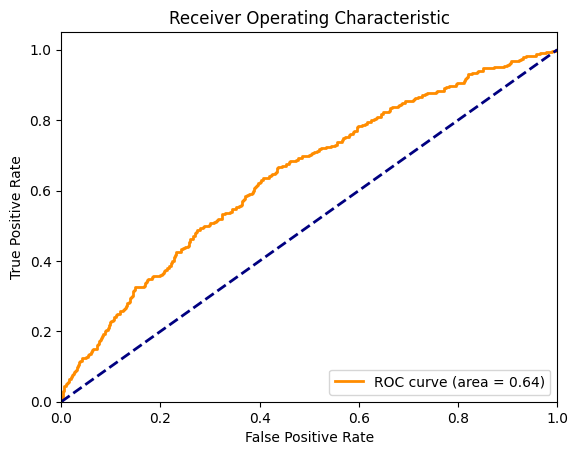

In [82]:
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, Flatten
from tensorflow.keras.models import Model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define the VGG-16 model without the last layer
def create_vgg16_base(input_shape):
    inputs = Input(shape=input_shape)
    
    # Block 1
    x = Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu')(inputs)
    x = Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
    
    # Block 2
    x = Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
    
    # Block 3
    x = Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
    
    # Block 4
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
    
    # Block 5
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
    
    # Flatten and fully connected layers
    x = Flatten()(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create the VGG-16 base model
vgg16_base_model = create_vgg16_base(input_shape=(100, 100, 1))

# Extract features
X_train_features = vgg16_base_model.predict(X_train)
X_test_features = vgg16_base_model.predict(X_test)

# Train AdaBoost classifier
adaboost_classifier16 = AdaBoostClassifier(n_estimators=120, learning_rate=0.5)
pipeline16 = Pipeline([
    ("scaler", StandardScaler()),
    ("adaboost_classifier", adaboost_classifier16)
])
pipeline16.fit(X_train_features, np.argmax(y_train, axis=1))


# Evaluate performance on training set
y_train_pred = pipeline16.predict(X_train_features)
train_accuracy = accuracy_score(np.argmax(y_train, axis=1), y_train_pred)
train_precision = precision_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_recall = recall_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_f1 = f1_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')

print("Training Accuracy:", train_accuracy*100,'%')
print("Training Precision:", train_precision*100,'%')
print("Training Recall:", train_recall*100,'%')
print("Training F1 Score:", train_f1*100,'%')

# Evaluate performance on testing set
y_test_pred = pipeline16.predict(X_test_features)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_test_pred)
test_precision = precision_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_recall = recall_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_f1 = f1_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')

print("Testing Accuracy:", test_accuracy*100,'%')
print("Testing Precision:", test_precision*100,'%')
print("Testing Recall:", test_recall*100,'%')
print("Testing F1 Score:", test_f1*100,'%')

# ROC curve
y_score = pipeline16.predict_proba(X_test_features)
fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())  # Flatten y_test and y_score
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [83]:
import joblib

model_path16 = "model_16/vgg16_base_model.h5"
classifier_path16 = "model_16/ada_boost_classifier16.pkl"

# Save the ResNet base model
vgg16_base_model.save(model_path16)

# Save the SVM classifier
joblib.dump(pipeline16, classifier_path16)

['model_16/ada_boost_classifier16.pkl']

38/38 ━━━━━━━━━━━━━━━━━━━━ 20s 522ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 563ms/step
Training Accuracy: 29.083333333333332 %
Training Precision: 29.494368077427634 %
Training Recall: 29.083333333333332 %
Training F1 Score: 27.53624705436733 %
Testing Accuracy: 15.0 %
Testing Precision: 13.017672629976634 %
Testing Recall: 15.0 %
Testing F1 Score: 11.08240101582308 %


C:\Users\satvi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


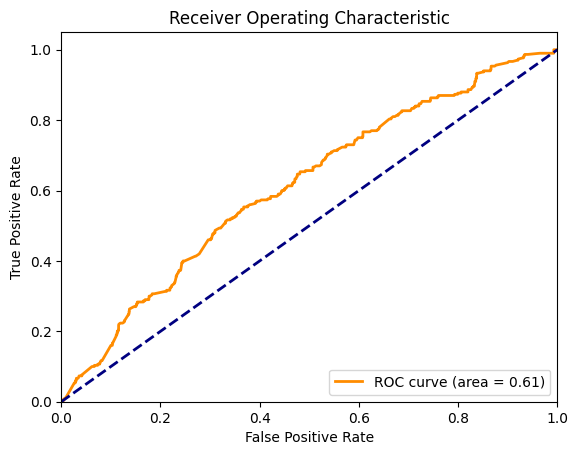

In [84]:
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, Flatten
from tensorflow.keras.models import Model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define the VGG-16 model without the last layer
def create_vgg16_base(input_shape):
    inputs = Input(shape=input_shape)
    
    # Block 1
    x = Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu')(inputs)
    x = Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
    
    # Block 2
    x = Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
    
    # Block 3
    x = Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
    
    # Block 4
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
    
    # Block 5
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
    
    # Flatten and fully connected layers
    x = Flatten()(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create the VGG-16 base model
vgg16_base_model = create_vgg16_base(input_shape=(100, 100, 1))

# Extract features
X_train_features = vgg16_base_model.predict(X_train)
X_test_features = vgg16_base_model.predict(X_test)

# Train AdaBoost classifier
adaboost_classifier17 = AdaBoostClassifier(n_estimators=120, learning_rate=0.005)
pipeline17 = Pipeline([
    ("scaler", StandardScaler()),
    ("adaboost_classifier", adaboost_classifier17)
])
pipeline17.fit(X_train_features, np.argmax(y_train, axis=1))


# Evaluate performance on training set
y_train_pred = pipeline17.predict(X_train_features)
train_accuracy = accuracy_score(np.argmax(y_train, axis=1), y_train_pred)
train_precision = precision_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_recall = recall_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_f1 = f1_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')

print("Training Accuracy:", train_accuracy*100,'%')
print("Training Precision:", train_precision*100,'%')
print("Training Recall:", train_recall*100,'%')
print("Training F1 Score:", train_f1*100,'%')

# Evaluate performance on testing set
y_test_pred = pipeline17.predict(X_test_features)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_test_pred)
test_precision = precision_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_recall = recall_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_f1 = f1_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')

print("Testing Accuracy:", test_accuracy*100,'%')
print("Testing Precision:", test_precision*100,'%')
print("Testing Recall:", test_recall*100,'%')
print("Testing F1 Score:", test_f1*100,'%')

# ROC curve
y_score = pipeline17.predict_proba(X_test_features)
fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())  # Flatten y_test and y_score
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [85]:
import joblib

model_path17 = "model_17/vgg16_base_model.h5"
classifier_path17 = "model_17/ada_boost_classifier17.pkl"

# Save the ResNet base model
vgg16_base_model.save(model_path17)

# Save the SVM classifier
joblib.dump(pipeline17, classifier_path17)

['model_17/ada_boost_classifier17.pkl']

38/38 ━━━━━━━━━━━━━━━━━━━━ 21s 554ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 516ms/step
Training Accuracy: 33.75 %
Training Precision: 37.28415331482295 %
Training Recall: 33.75 %
Training F1 Score: 34.130738813773306 %
Testing Accuracy: 21.666666666666668 %
Testing Precision: 28.624570952783028 %
Testing Recall: 21.666666666666668 %
Testing F1 Score: 20.208423501660587 %


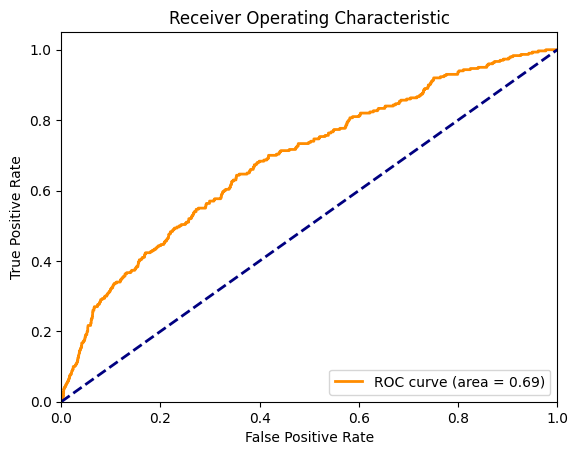

In [88]:
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, Flatten
from tensorflow.keras.models import Model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define the VGG-16 model without the last layer
def create_vgg16_base(input_shape):
    inputs = Input(shape=input_shape)
    
    # Block 1
    x = Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu')(inputs)
    x = Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
    
    # Block 2
    x = Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
    
    # Block 3
    x = Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
    
    # Block 4
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
    
    # Block 5
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
    
    # Flatten and fully connected layers
    x = Flatten()(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create the VGG-16 base model
vgg16_base_model = create_vgg16_base(input_shape=(100, 100, 1))

# Extract features
X_train_features = vgg16_base_model.predict(X_train)
X_test_features = vgg16_base_model.predict(X_test)

# Train AdaBoost classifier
adaboost_classifier18 = AdaBoostClassifier(n_estimators=300, learning_rate=0.005)
pipeline18 = Pipeline([
    ("scaler", StandardScaler()),
    ("adaboost_classifier", adaboost_classifier18)
])
pipeline18.fit(X_train_features, np.argmax(y_train, axis=1))


# Evaluate performance on training set
y_train_pred = pipeline18.predict(X_train_features)
train_accuracy = accuracy_score(np.argmax(y_train, axis=1), y_train_pred)
train_precision = precision_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_recall = recall_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_f1 = f1_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')

print("Training Accuracy:", train_accuracy*100,'%')
print("Training Precision:", train_precision*100,'%')
print("Training Recall:", train_recall*100,'%')
print("Training F1 Score:", train_f1*100,'%')

# Evaluate performance on testing set
y_test_pred = pipeline18.predict(X_test_features)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_test_pred)
test_precision = precision_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_recall = recall_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_f1 = f1_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')

print("Testing Accuracy:", test_accuracy*100,'%')
print("Testing Precision:", test_precision*100,'%')
print("Testing Recall:", test_recall*100,'%')
print("Testing F1 Score:", test_f1*100,'%')

# ROC curve
y_score = pipeline18.predict_proba(X_test_features)
fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())  # Flatten y_test and y_score
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [89]:
import joblib

model_path18 = "model_18/vgg16_base_model.h5"
classifier_path18 = "model_18/ada_boost_classifier18.pkl"

# Save the ResNet base model
vgg16_base_model.save(model_path18)

# Save the SVM classifier
joblib.dump(pipeline18, classifier_path18)

['model_18/ada_boost_classifier18.pkl']

## VGG-16+Random Forest

38/38 ━━━━━━━━━━━━━━━━━━━━ 20s 523ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 452ms/step
Training Accuracy: 100.0 %
Training Precision: 100.0 %
Training Recall: 100.0 %
Training F1 Score: 100.0 %
Testing Accuracy: 27.333333333333332 %
Testing Precision: 35.173847896587255 %
Testing Recall: 27.333333333333332 %
Testing F1 Score: 26.049571711847193 %


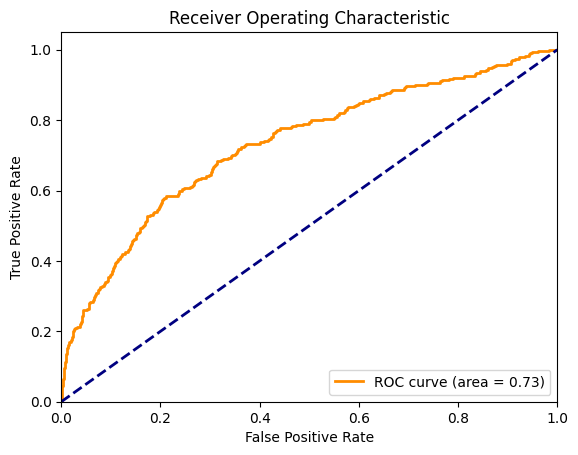

In [91]:
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, Flatten
from tensorflow.keras.models import Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define the VGG-16 model without the last layer
def create_vgg16_base(input_shape):
    inputs = Input(shape=input_shape)
    
    # Block 1
    x = Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu')(inputs)
    x = Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
    
    # Block 2
    x = Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
    
    # Block 3
    x = Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
    
    # Block 4
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
    
    # Block 5
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
    
    # Flatten and fully connected layers
    x = Flatten()(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create the VGG-16 base model
vgg16_base_model = create_vgg16_base(input_shape=(100, 100, 1))

# Extract features
X_train_features = vgg16_base_model.predict(X_train)
X_test_features = vgg16_base_model.predict(X_test)

# Train Random Forest classifier
random_forest_classifier19 = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42)
pipeline19 = Pipeline([
    ("scaler", StandardScaler()),
    ("random_forest_classifier", random_forest_classifier19)
])
pipeline19.fit(X_train_features, np.argmax(y_train, axis=1))


# Evaluate performance on training set
y_train_pred = pipeline19.predict(X_train_features)
train_accuracy = accuracy_score(np.argmax(y_train, axis=1), y_train_pred)
train_precision = precision_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_recall = recall_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_f1 = f1_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')

print("Training Accuracy:", train_accuracy*100,'%')
print("Training Precision:", train_precision*100,'%')
print("Training Recall:", train_recall*100,'%')
print("Training F1 Score:", train_f1*100,'%')

# Evaluate performance on testing set
y_test_pred = pipeline19.predict(X_test_features)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_test_pred)
test_precision = precision_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_recall = recall_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_f1 = f1_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')

print("Testing Accuracy:", test_accuracy*100,'%')
print("Testing Precision:", test_precision*100,'%')
print("Testing Recall:", test_recall*100,'%')
print("Testing F1 Score:", test_f1*100,'%')

# ROC curve
y_score = pipeline19.predict_proba(X_test_features)
fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())  # Flatten y_test and y_score
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [92]:
import joblib

model_path19 = "model_19/vgg16_base_model.h5"
classifier_path19 = "model_19/random_forest_classifier19.pkl"

# Save the ResNet base model
vgg16_base_model.save(model_path19)

# Save the SVM classifier
joblib.dump(pipeline19, classifier_path19)

['model_19/random_forest_classifier19.pkl']

38/38 ━━━━━━━━━━━━━━━━━━━━ 21s 549ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 529ms/step
Training Accuracy: 100.0 %
Training Precision: 100.0 %
Training Recall: 100.0 %
Training F1 Score: 100.0 %
Testing Accuracy: 32.666666666666664 %
Testing Precision: 40.72778240636352 %
Testing Recall: 32.666666666666664 %
Testing F1 Score: 31.15353448500549 %


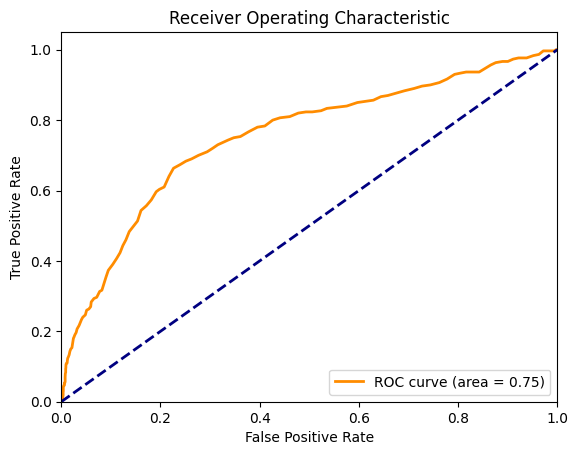

In [93]:
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, Flatten
from tensorflow.keras.models import Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define the VGG-16 model without the last layer
def create_vgg16_base(input_shape):
    inputs = Input(shape=input_shape)
    
    # Block 1
    x = Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu')(inputs)
    x = Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
    
    # Block 2
    x = Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
    
    # Block 3
    x = Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
    
    # Block 4
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
    
    # Block 5
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
    
    # Flatten and fully connected layers
    x = Flatten()(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create the VGG-16 base model
vgg16_base_model = create_vgg16_base(input_shape=(100, 100, 1))

# Extract features
X_train_features = vgg16_base_model.predict(X_train)
X_test_features = vgg16_base_model.predict(X_test)

# Train Random Forest classifier
random_forest_classifier20 = RandomForestClassifier(n_estimators=500, max_depth=50, random_state=42)
pipeline20 = Pipeline([
    ("scaler", StandardScaler()),
    ("random_forest_classifier", random_forest_classifier20)
])
pipeline20.fit(X_train_features, np.argmax(y_train, axis=1))


# Evaluate performance on training set
y_train_pred = pipeline20.predict(X_train_features)
train_accuracy = accuracy_score(np.argmax(y_train, axis=1), y_train_pred)
train_precision = precision_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_recall = recall_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_f1 = f1_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')

print("Training Accuracy:", train_accuracy*100,'%')
print("Training Precision:", train_precision*100,'%')
print("Training Recall:", train_recall*100,'%')
print("Training F1 Score:", train_f1*100,'%')

# Evaluate performance on testing set
y_test_pred = pipeline20.predict(X_test_features)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_test_pred)
test_precision = precision_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_recall = recall_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_f1 = f1_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')

print("Testing Accuracy:", test_accuracy*100,'%')
print("Testing Precision:", test_precision*100,'%')
print("Testing Recall:", test_recall*100,'%')
print("Testing F1 Score:", test_f1*100,'%')

# ROC curve
y_score = pipeline20.predict_proba(X_test_features)
fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())  # Flatten y_test and y_score
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [94]:
import joblib

model_path20 = "model_20/vgg16_base_model.h5"
classifier_path20 = "model_20/random_forest_classifier20.pkl"

# Save the ResNet base model
vgg16_base_model.save(model_path20)

# Save the SVM classifier
joblib.dump(pipeline20, classifier_path20)

['model_20/random_forest_classifier20.pkl']

## Inception-V3+Random Forest

38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step
Training Accuracy: 100.0 %
Training Precision: 100.0 %
Training Recall: 100.0 %
Training F1 Score: 100.0 %
Testing Accuracy: 42.0 %
Testing Precision: 44.68574451737541 %
Testing Recall: 42.0 %
Testing F1 Score: 40.08885701650227 %


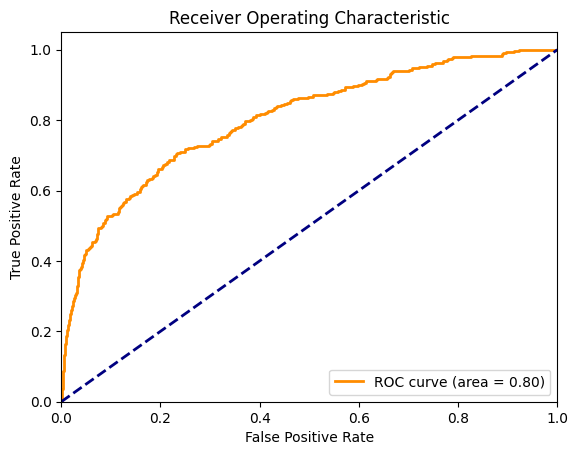

In [96]:
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, concatenate, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define the Inception module
def inception_module(x, filters):
    branch1x1 = Conv2D(filters=filters[0], kernel_size=(1, 1), padding='same', activation='relu')(x)

    branch3x3 = Conv2D(filters=filters[1], kernel_size=(1, 1), padding='same', activation='relu')(x)
    branch3x3 = Conv2D(filters=filters[2], kernel_size=(3, 3), padding='same', activation='relu')(branch3x3)

    branch5x5 = Conv2D(filters=filters[3], kernel_size=(1, 1), padding='same', activation='relu')(x)
    branch5x5 = Conv2D(filters=filters[4], kernel_size=(5, 5), padding='same', activation='relu')(branch5x5)

    branch_pool = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)
    branch_pool = Conv2D(filters=filters[5], kernel_size=(1, 1), padding='same', activation='relu')(branch_pool)

    output = concatenate([branch1x1, branch3x3, branch5x5, branch_pool], axis=-1)
    return output

# Define the Inception-V3 model without the last layer
def create_inception_v3_base(input_shape):
    inputs = Input(shape=input_shape)

    # Initial convolutional layer
    x = Conv2D(64, kernel_size=(7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Inception blocks
    x = inception_module(x, filters=[64, 96, 128, 16, 32, 32])
    x = inception_module(x, filters=[128, 128, 192, 32, 96, 64])
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Flatten and fully connected layers
    x = Flatten()(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create the Inception-V3 base model
inception_v3_base_model = create_inception_v3_base(input_shape=(100, 100, 1))

# Extract features
X_train_features = inception_v3_base_model.predict(X_train)
X_test_features = inception_v3_base_model.predict(X_test)

# Train Random Forest classifier
random_forest_classifier21 = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42)
pipeline21 = Pipeline([
    ("scaler", StandardScaler()),
    ("random_forest_classifier", random_forest_classifier21)
])
pipeline21.fit(X_train_features, np.argmax(y_train, axis=1))

# Evaluate performance on training set
y_train_pred = pipeline21.predict(X_train_features)
train_accuracy = accuracy_score(np.argmax(y_train, axis=1), y_train_pred)
train_precision = precision_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_recall = recall_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_f1 = f1_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')

print("Training Accuracy:", train_accuracy*100,'%')
print("Training Precision:", train_precision*100,'%')
print("Training Recall:", train_recall*100,'%')
print("Training F1 Score:", train_f1*100,'%')

# Evaluate performance on testing set
y_test_pred = pipeline21.predict(X_test_features)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_test_pred)
test_precision = precision_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_recall = recall_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_f1 = f1_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')

print("Testing Accuracy:", test_accuracy*100,'%')
print("Testing Precision:", test_precision*100,'%')
print("Testing Recall:", test_recall*100,'%')
print("Testing F1 Score:", test_f1*100,'%')

# ROC curve
y_score = pipeline21.predict_proba(X_test_features)
fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())  # Flatten y_test and y_score
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [97]:
import joblib

model_path21 = "model_21/inception_v3_base_model.h5"
classifier_path21 = "model_21/random_forest_classifier21.pkl"

# Save the ResNet base model
inception_v3_base_model.save(model_path21)

# Save the SVM classifier
joblib.dump(pipeline21, classifier_path21)

['model_21/random_forest_classifier21.pkl']

38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step
Training Accuracy: 100.0 %
Training Precision: 100.0 %
Training Recall: 100.0 %
Training F1 Score: 100.0 %
Testing Accuracy: 41.333333333333336 %
Testing Precision: 48.61100812299395 %
Testing Recall: 41.333333333333336 %
Testing F1 Score: 40.87714575480646 %


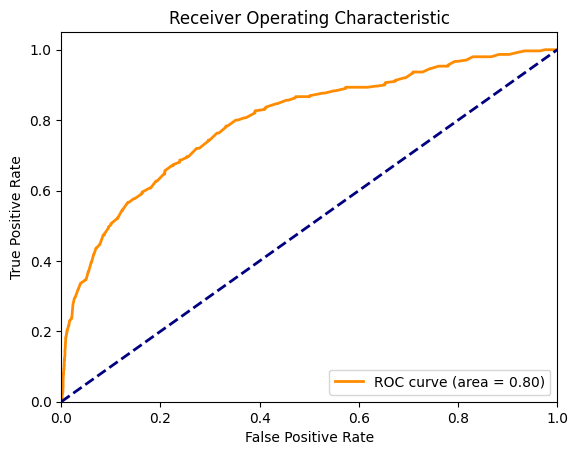

In [98]:
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, concatenate, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define the Inception module
def inception_module(x, filters):
    branch1x1 = Conv2D(filters=filters[0], kernel_size=(1, 1), padding='same', activation='relu')(x)

    branch3x3 = Conv2D(filters=filters[1], kernel_size=(1, 1), padding='same', activation='relu')(x)
    branch3x3 = Conv2D(filters=filters[2], kernel_size=(3, 3), padding='same', activation='relu')(branch3x3)

    branch5x5 = Conv2D(filters=filters[3], kernel_size=(1, 1), padding='same', activation='relu')(x)
    branch5x5 = Conv2D(filters=filters[4], kernel_size=(5, 5), padding='same', activation='relu')(branch5x5)

    branch_pool = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)
    branch_pool = Conv2D(filters=filters[5], kernel_size=(1, 1), padding='same', activation='relu')(branch_pool)

    output = concatenate([branch1x1, branch3x3, branch5x5, branch_pool], axis=-1)
    return output

# Define the Inception-V3 model without the last layer
def create_inception_v3_base(input_shape):
    inputs = Input(shape=input_shape)

    # Initial convolutional layer
    x = Conv2D(64, kernel_size=(7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Inception blocks
    x = inception_module(x, filters=[64, 96, 128, 16, 32, 32])
    x = inception_module(x, filters=[128, 128, 192, 32, 96, 64])
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Flatten and fully connected layers
    x = Flatten()(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create the Inception-V3 base model
inception_v3_base_model = create_inception_v3_base(input_shape=(100, 100, 1))

# Extract features
X_train_features = inception_v3_base_model.predict(X_train)
X_test_features = inception_v3_base_model.predict(X_test)

# Train Random Forest classifier
random_forest_classifier22 = RandomForestClassifier(n_estimators=350, max_depth=20, random_state=42)
pipeline22 = Pipeline([
    ("scaler", StandardScaler()),
    ("random_forest_classifier", random_forest_classifier22)
])
pipeline22.fit(X_train_features, np.argmax(y_train, axis=1))


# Evaluate performance on training set
y_train_pred = pipeline22.predict(X_train_features)
train_accuracy = accuracy_score(np.argmax(y_train, axis=1), y_train_pred)
train_precision = precision_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_recall = recall_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_f1 = f1_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')

print("Training Accuracy:", train_accuracy*100,'%')
print("Training Precision:", train_precision*100,'%')
print("Training Recall:", train_recall*100,'%')
print("Training F1 Score:", train_f1*100,'%')

# Evaluate performance on testing set
y_test_pred = pipeline22.predict(X_test_features)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_test_pred)
test_precision = precision_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_recall = recall_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_f1 = f1_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')

print("Testing Accuracy:", test_accuracy*100,'%')
print("Testing Precision:", test_precision*100,'%')
print("Testing Recall:", test_recall*100,'%')
print("Testing F1 Score:", test_f1*100,'%')

# ROC curve
y_score = pipeline22.predict_proba(X_test_features)
fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())  # Flatten y_test and y_score
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [99]:
import joblib

model_path22 = "model_22/inception_v3_base_model.h5"
classifier_path22 = "model_22/random_forest_classifier22.pkl"

# Save the ResNet base model
inception_v3_base_model.save(model_path22)

# Save the SVM classifier
joblib.dump(pipeline22, classifier_path22)

['model_22/random_forest_classifier22.pkl']

38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step
Training Accuracy: 100.0 %
Training Precision: 100.0 %
Training Recall: 100.0 %
Training F1 Score: 100.0 %
Testing Accuracy: 44.0 %
Testing Precision: 54.26253588801727 %
Testing Recall: 44.0 %
Testing F1 Score: 42.70053508977156 %


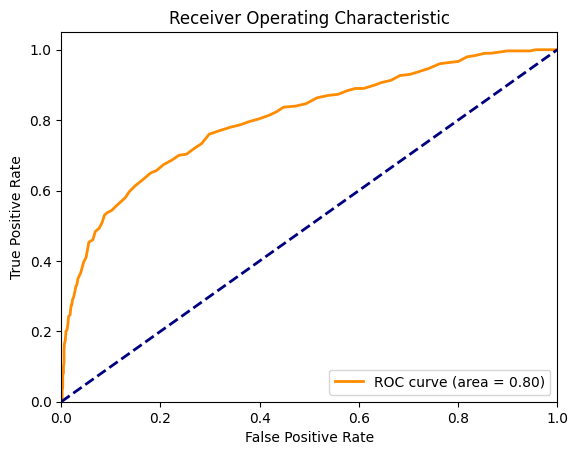

In [100]:
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, concatenate, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define the Inception module
def inception_module(x, filters):
    branch1x1 = Conv2D(filters=filters[0], kernel_size=(1, 1), padding='same', activation='relu')(x)

    branch3x3 = Conv2D(filters=filters[1], kernel_size=(1, 1), padding='same', activation='relu')(x)
    branch3x3 = Conv2D(filters=filters[2], kernel_size=(3, 3), padding='same', activation='relu')(branch3x3)

    branch5x5 = Conv2D(filters=filters[3], kernel_size=(1, 1), padding='same', activation='relu')(x)
    branch5x5 = Conv2D(filters=filters[4], kernel_size=(5, 5), padding='same', activation='relu')(branch5x5)

    branch_pool = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)
    branch_pool = Conv2D(filters=filters[5], kernel_size=(1, 1), padding='same', activation='relu')(branch_pool)

    output = concatenate([branch1x1, branch3x3, branch5x5, branch_pool], axis=-1)
    return output

# Define the Inception-V3 model without the last layer
def create_inception_v3_base(input_shape):
    inputs = Input(shape=input_shape)

    # Initial convolutional layer
    x = Conv2D(64, kernel_size=(7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Inception blocks
    x = inception_module(x, filters=[64, 96, 128, 16, 32, 32])
    x = inception_module(x, filters=[128, 128, 192, 32, 96, 64])
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Flatten and fully connected layers
    x = Flatten()(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create the Inception-V3 base model
inception_v3_base_model = create_inception_v3_base(input_shape=(100, 100, 1))

# Extract features
X_train_features = inception_v3_base_model.predict(X_train)
X_test_features = inception_v3_base_model.predict(X_test)

# Train Random Forest classifier
random_forest_classifier23 = RandomForestClassifier(n_estimators=400, max_depth=30, random_state=42)
pipeline23 = Pipeline([
    ("scaler", StandardScaler()),
    ("random_forest_classifier", random_forest_classifier23)
])
pipeline23.fit(X_train_features, np.argmax(y_train, axis=1))


# Evaluate performance on training set
y_train_pred = pipeline23.predict(X_train_features)
train_accuracy = accuracy_score(np.argmax(y_train, axis=1), y_train_pred)
train_precision = precision_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_recall = recall_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_f1 = f1_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')

print("Training Accuracy:", train_accuracy*100,'%')
print("Training Precision:", train_precision*100,'%')
print("Training Recall:", train_recall*100,'%')
print("Training F1 Score:", train_f1*100,'%')

# Evaluate performance on testing set
y_test_pred = pipeline23.predict(X_test_features)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_test_pred)
test_precision = precision_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_recall = recall_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_f1 = f1_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')

print("Testing Accuracy:", test_accuracy*100,'%')
print("Testing Precision:", test_precision*100,'%')
print("Testing Recall:", test_recall*100,'%')
print("Testing F1 Score:", test_f1*100,'%')

# ROC curve
y_score = pipeline23.predict_proba(X_test_features)
fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())  # Flatten y_test and y_score
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [101]:
import joblib

model_path23 = "model_23/inception_v3_base_model.h5"
classifier_path23 = "model_23/random_forest_classifier23.pkl"

# Save the ResNet base model
inception_v3_base_model.save(model_path23)

# Save the SVM classifier
joblib.dump(pipeline23, classifier_path23)

['model_23/random_forest_classifier23.pkl']

## Resnet+Random Forest

38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step
Training Accuracy: 100.0 %
Training Precision: 100.0 %
Training Recall: 100.0 %
Training F1 Score: 100.0 %
Testing Accuracy: 43.0 %
Testing Precision: 48.5749073308052 %
Testing Recall: 43.0 %
Testing F1 Score: 42.058466404314075 %


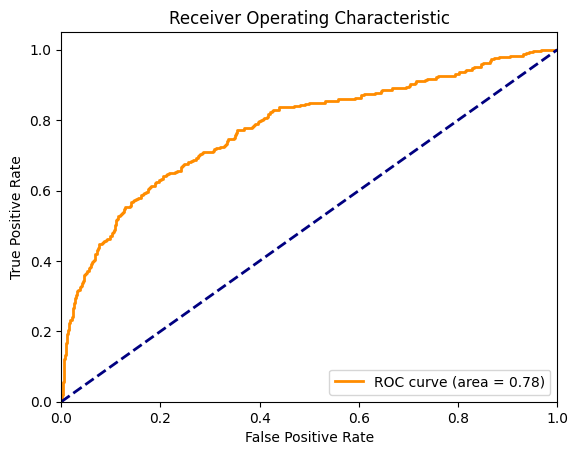

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, Flatten, Dense, Dropout, Activation, Add
from tensorflow.keras.models import Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define the Residual Block
def residual_block(input_tensor, filters, strides=(1, 1)):
    shortcut = input_tensor

    # First convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=strides, padding='same')(input_tensor)
    x = Activation('relu')(x)

    # Second convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)

    # If dimensions change, adjust shortcut
    if strides != (1, 1) or shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, kernel_size=(1, 1), strides=strides, padding='valid')(shortcut)

    x = Add()([x, shortcut])
    x = Activation('relu')(x)

    return x

# Define the ResNet model without the last layer
def create_resnet_base(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, (7, 7), strides=2, activation='relu', padding='same')(inputs)
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Residual blocks
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=128, strides=(2, 2))
    x = residual_block(x, filters=128)
    x = residual_block(x, filters=256, strides=(2, 2))
    x = residual_block(x, filters=256)
    x = residual_block(x, filters=512, strides=(2, 2))
    x = residual_block(x, filters=512)

    x = Flatten()(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create the ResNet base model
resnet_base_model = create_resnet_base(input_shape=(100, 100, 1))

# Extract features
X_train_features = resnet_base_model.predict(X_train)
X_test_features = resnet_base_model.predict(X_test)

# Train Random Forest classifier
random_forest_classifier24 = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42)
pipeline24 = Pipeline([
    ("scaler", StandardScaler()),
    ("random_forest_classifier", random_forest_classifier24)
])
pipeline24.fit(X_train_features, np.argmax(y_train, axis=1))


# Evaluate performance on training set
y_train_pred = pipeline24.predict(X_train_features)
train_accuracy = accuracy_score(np.argmax(y_train, axis=1), y_train_pred)
train_precision = precision_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_recall = recall_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_f1 = f1_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')

print("Training Accuracy:", train_accuracy*100,'%')
print("Training Precision:", train_precision*100,'%')
print("Training Recall:", train_recall*100,'%')
print("Training F1 Score:", train_f1*100,'%')

# Evaluate performance on testing set
y_test_pred = pipeline24.predict(X_test_features)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_test_pred)
test_precision = precision_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_recall = recall_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_f1 = f1_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')

print("Testing Accuracy:", test_accuracy*100,'%')
print("Testing Precision:", test_precision*100,'%')
print("Testing Recall:", test_recall*100,'%')
print("Testing F1 Score:", test_f1*100,'%')

# ROC curve
y_score = pipeline24.predict_proba(X_test_features)
fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())  # Flatten y_test and y_score
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [104]:
import joblib

model_path24 = "model_24/resnet_base_model.h5"
classifier_path24 = "model_24/random_forest_classifier24.pkl"

# Save the ResNet base model
resnet_base_model.save(model_path24)

# Save the SVM classifier
joblib.dump(pipeline24, classifier_path24)

['model_24/random_forest_classifier24.pkl']

38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step
Training Accuracy: 100.0 %
Training Precision: 100.0 %
Training Recall: 100.0 %
Training F1 Score: 100.0 %
Testing Accuracy: 44.0 %
Testing Precision: 48.46730023073246 %
Testing Recall: 44.0 %
Testing F1 Score: 43.83617727765238 %


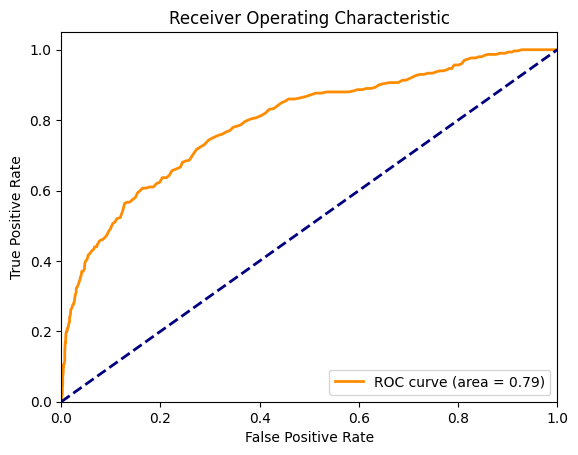

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, Flatten, Dense, Dropout, Activation, Add
from tensorflow.keras.models import Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define the Residual Block
def residual_block(input_tensor, filters, strides=(1, 1)):
    shortcut = input_tensor

    # First convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=strides, padding='same')(input_tensor)
    x = Activation('relu')(x)

    # Second convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)

    # If dimensions change, adjust shortcut
    if strides != (1, 1) or shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, kernel_size=(1, 1), strides=strides, padding='valid')(shortcut)

    x = Add()([x, shortcut])
    x = Activation('relu')(x)

    return x

# Define the ResNet model without the last layer
def create_resnet_base(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, (7, 7), strides=2, activation='relu', padding='same')(inputs)
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Residual blocks
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=128, strides=(2, 2))
    x = residual_block(x, filters=128)
    x = residual_block(x, filters=256, strides=(2, 2))
    x = residual_block(x, filters=256)
    x = residual_block(x, filters=512, strides=(2, 2))
    x = residual_block(x, filters=512)

    x = Flatten()(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create the ResNet base model
resnet_base_model = create_resnet_base(input_shape=(100, 100, 1))

# Extract features
X_train_features = resnet_base_model.predict(X_train)
X_test_features = resnet_base_model.predict(X_test)

# Train Random Forest classifier
random_forest_classifier25 = RandomForestClassifier(n_estimators=1000, max_depth=90, random_state=32)
pipeline25 = Pipeline([
    ("scaler", StandardScaler()),
    ("random_forest_classifier", random_forest_classifier25)
])
pipeline25.fit(X_train_features, np.argmax(y_train, axis=1))


# Evaluate performance on training set
y_train_pred = pipeline25.predict(X_train_features)
train_accuracy = accuracy_score(np.argmax(y_train, axis=1), y_train_pred)
train_precision = precision_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_recall = recall_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_f1 = f1_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')

print("Training Accuracy:", train_accuracy*100,'%')
print("Training Precision:", train_precision*100,'%')
print("Training Recall:", train_recall*100,'%')
print("Training F1 Score:", train_f1*100,'%')

# Evaluate performance on testing set
y_test_pred = pipeline25.predict(X_test_features)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_test_pred)
test_precision = precision_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_recall = recall_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_f1 = f1_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')

print("Testing Accuracy:", test_accuracy*100,'%')
print("Testing Precision:", test_precision*100,'%')
print("Testing Recall:", test_recall*100,'%')
print("Testing F1 Score:", test_f1*100,'%')

# ROC curve
y_score = pipeline25.predict_proba(X_test_features)
fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())  # Flatten y_test and y_score
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [106]:
import joblib

model_path25 = "model_25/resnet_base_model.h5"
classifier_path25 = "model_25/random_forest_classifier25.pkl"

# Save the ResNet base model
resnet_base_model.save(model_path25)

# Save the SVM classifier
joblib.dump(pipeline25, classifier_path25)

['model_25/random_forest_classifier25.pkl']

38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 141ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step
Training Accuracy: 100.0 %
Training Precision: 100.0 %
Training Recall: 100.0 %
Training F1 Score: 100.0 %
Testing Accuracy: 38.666666666666664 %
Testing Precision: 42.38073840968578 %
Testing Recall: 38.666666666666664 %
Testing F1 Score: 38.24741754310736 %


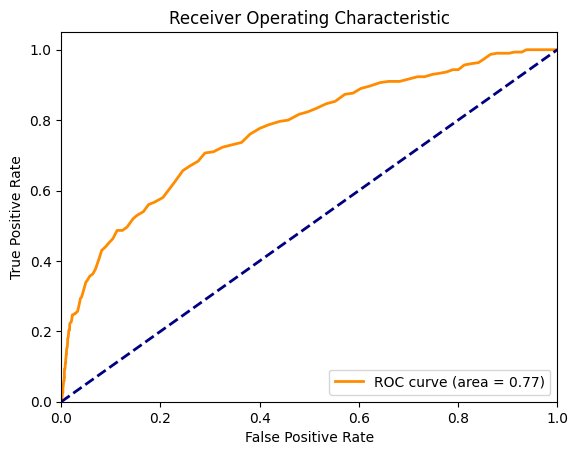

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, Flatten, Dense, Dropout, Activation, Add
from tensorflow.keras.models import Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define the Residual Block
def residual_block(input_tensor, filters, strides=(1, 1)):
    shortcut = input_tensor

    # First convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=strides, padding='same')(input_tensor)
    x = Activation('relu')(x)

    # Second convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)

    # If dimensions change, adjust shortcut
    if strides != (1, 1) or shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, kernel_size=(1, 1), strides=strides, padding='valid')(shortcut)

    x = Add()([x, shortcut])
    x = Activation('relu')(x)

    return x

# Define the ResNet model without the last layer
def create_resnet_base(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, (7, 7), strides=2, activation='relu', padding='same')(inputs)
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Residual blocks
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=128, strides=(2, 2))
    x = residual_block(x, filters=128)
    x = residual_block(x, filters=256, strides=(2, 2))
    x = residual_block(x, filters=256)
    x = residual_block(x, filters=512, strides=(2, 2))
    x = residual_block(x, filters=512)

    x = Flatten()(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create the ResNet base model
resnet_base_model = create_resnet_base(input_shape=(100, 100, 1))

# Extract features
X_train_features = resnet_base_model.predict(X_train)
X_test_features = resnet_base_model.predict(X_test)

# Train Random Forest classifier
random_forest_classifier26 = RandomForestClassifier(n_estimators=500, max_depth=100, random_state=32)
pipeline26 = Pipeline([
    ("scaler", StandardScaler()),
    ("random_forest_classifier", random_forest_classifier26)
])
pipeline26.fit(X_train_features, np.argmax(y_train, axis=1))


# Evaluate performance on training set
y_train_pred = pipeline26.predict(X_train_features)
train_accuracy = accuracy_score(np.argmax(y_train, axis=1), y_train_pred)
train_precision = precision_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_recall = recall_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_f1 = f1_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')

print("Training Accuracy:", train_accuracy*100,'%')
print("Training Precision:", train_precision*100,'%')
print("Training Recall:", train_recall*100,'%')
print("Training F1 Score:", train_f1*100,'%')

# Evaluate performance on testing set
y_test_pred = pipeline26.predict(X_test_features)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_test_pred)
test_precision = precision_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_recall = recall_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_f1 = f1_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')

print("Testing Accuracy:", test_accuracy*100,'%')
print("Testing Precision:", test_precision*100,'%')
print("Testing Recall:", test_recall*100,'%')
print("Testing F1 Score:", test_f1*100,'%')

# ROC curve
y_score = pipeline26.predict_proba(X_test_features)
fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())  # Flatten y_test and y_score
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [109]:
import joblib

model_path26 = "model_26/resnet_base_model.h5"
classifier_path26 = "model_26/random_forest_classifier26.pkl"

# Save the ResNet base model
resnet_base_model.save(model_path26)

# Save the SVM classifier
joblib.dump(pipeline26, classifier_path26)

['model_26/random_forest_classifier26.pkl']

## Mobile Net

In [110]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, GlobalAveragePooling2D, Dense, Dropout, Add, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adagrad

def depthwise_separable_conv2d(input_tensor, pointwise_filters, strides=(1, 1)):
    # Depthwise convolution (simulated using grouped Conv3D)
    channels = input_tensor.shape[-1]
    depthwise_conv = Conv2D(channels, kernel_size=(3, 3), strides=strides, padding='same', groups=channels)(input_tensor)
    x = BatchNormalization()(depthwise_conv)
    x = ReLU()(x)
    
    # Pointwise convolution
    pointwise_conv = Conv2D(pointwise_filters, kernel_size=(1, 1), strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(pointwise_conv)
    x = ReLU()(x)
    return x

def create_mobilenet(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # Initial convolution and pooling layer
    x = Conv2D(32, kernel_size=(3, 3), strides=(2, 2), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # MobileNet blocks
    x = depthwise_separable_conv2d(x, 64)
    x = depthwise_separable_conv2d(x, 128, strides=(2, 2))
    x = depthwise_separable_conv2d(x, 128)
    x = depthwise_separable_conv2d(x, 256, strides=(2, 2))
    x = depthwise_separable_conv2d(x, 256)
    x = depthwise_separable_conv2d(x, 512, strides=(2, 2))
    x = depthwise_separable_conv2d(x, 512)

    # Global pooling and dense layers
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Create the MobileNet model
mobilenet_model = create_mobilenet(input_shape=(100, 100, 1), num_classes=10)

# Compile the model
mobilenet_model.compile(loss='categorical_crossentropy', optimizer=Adagrad(), metrics=['accuracy'])

# Print model summary
mobilenet_model.summary()


Model: "functional_91"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_52 (InputLayer)          │ (None, 100, 100, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_712 (Conv2D)                  │ (None, 50, 50, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_26               │ (None, 50, 50, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 50, 50, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_713 (Conv2D)                  │ (None, 50, 50, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_27               │ (None, 50, 50, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 50, 50, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_714 (Conv2D)                  │ (None, 50, 50, 64)          │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_28               │ (None, 50, 50, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_715 (Conv2D)                  │ (None, 25, 25, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_29               │ (None, 25, 25, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_716 (Conv2D)                  │ (None, 25, 25, 128)         │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_30               │ (None, 25, 25, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_4 (ReLU)                       │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_717 (Conv2D)                  │ (None, 25, 25, 128)         │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_31               │ (None, 25, 25, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,731,146 (6.60 MB)

 Trainable params: 1,724,618 (6.58 MB)

 Non-trainable params: 6,528 (25.50 KB)

In [111]:
t1 = time.time()
history = mobilenet_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)
t2 = time.time()
print()
print(f"Training time : {t2 - t1} secs.")

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 182s 5s/step - accuracy: 0.0977 - loss: 2.4415 - val_accuracy: 0.1000 - val_loss: 2.3025
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 169s 4s/step - accuracy: 0.1152 - loss: 2.4011 - val_accuracy: 0.1000 - val_loss: 2.3029
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 179s 5s/step - accuracy: 0.1201 - loss: 2.3915 - val_accuracy: 0.1000 - val_loss: 2.3034
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 173s 5s/step - accuracy: 0.0986 - loss: 2.3836 - val_accuracy: 0.1000 - val_loss: 2.3038
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 173s 5s/step - accuracy: 0.0845 - loss: 2.3521 - val_accuracy: 0.1000 - val_loss: 2.3042
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 170s 4s/step - accuracy: 0.1168 - loss: 2.3439 - val_accuracy: 0.1000 - val_loss: 2.3046
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 170s 4s/step - accuracy: 0.0970 - loss: 2.3516 - val_accuracy: 0.1000 - val_loss: 2.3048
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 170s 4s/step - accuracy: 0.1075 - loss: 2.3249 - val_accuracy: 0.1000 - v

In [112]:
# Save the model
model_path = 'mobilenet/mobilenet_model.h5'
mobilenet_model.save(model_path)

ValueError: Unable to synchronously create dataset (name already exists)

## Mobile Net+Random Forest

38/38 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step
Training Accuracy: 100.0 %
Training Precision: 100.0 %
Training Recall: 100.0 %
Training F1 Score: 100.0 %
Testing Accuracy: 17.333333333333336 %
Testing Precision: 30.214043808124924 %
Testing Recall: 17.333333333333336 %
Testing F1 Score: 15.511368796650476 %


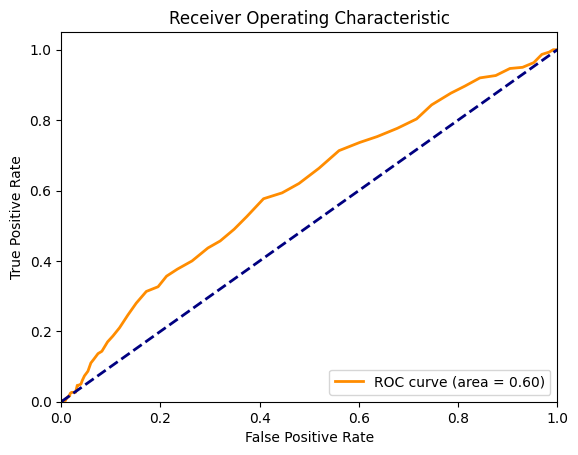

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv3D, GlobalAveragePooling3D, Dense, Dropout, Activation, BatchNormalization, ReLU
from tensorflow.keras.models import Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define the depthwise separable convolution block
def depthwise_separable_conv2d(input_tensor, pointwise_filters, strides=(1, 1)):
    channels = input_tensor.shape[-1]
    depthwise_conv = Conv2D(channels, kernel_size=(3, 3), strides=strides, padding='same', groups=channels)(input_tensor)
    x = BatchNormalization()(depthwise_conv)
    x = ReLU()(x)
    
    pointwise_conv = Conv2D(pointwise_filters, kernel_size=(1, 1), strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(pointwise_conv)
    x = ReLU()(x)
    return x

# Define the MobileNet model without the last layer
def create_mobilenet_base(input_shape):
    inputs = Input(shape=input_shape)

    # Initial convolution and pooling layer
    x = Conv2D(32, kernel_size=(3, 3), strides=(2, 2), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # MobileNet blocks
    x = depthwise_separable_conv2d(x, 64)
    x = depthwise_separable_conv2d(x, 128, strides=(2, 2))
    x = depthwise_separable_conv2d(x, 128)
    x = depthwise_separable_conv2d(x, 256, strides=(2, 2))
    x = depthwise_separable_conv2d(x, 256)
    x = depthwise_separable_conv2d(x, 512, strides=(2, 2))
    x = depthwise_separable_conv2d(x, 512)

    # Global pooling
    x = GlobalAveragePooling2D()(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create the MobileNet base model
mobilenet_base_model = create_mobilenet_base(input_shape=(100, 100, 1))

# Extract features
X_train_features = mobilenet_base_model.predict(X_train)
X_test_features = mobilenet_base_model.predict(X_test)

# Train Random Forest classifier
random_forest_classifier27 = RandomForestClassifier(n_estimators=200, max_depth=30, random_state=42)
pipeline27 = Pipeline([
    ("scaler", StandardScaler()),
    ("random_forest_classifier", random_forest_classifier27)
])
pipeline27.fit(X_train_features, np.argmax(y_train, axis=1))


# Evaluate performance on training set
y_train_pred = pipeline27.predict(X_train_features)
train_accuracy = accuracy_score(np.argmax(y_train, axis=1), y_train_pred)
train_precision = precision_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_recall = recall_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_f1 = f1_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')

print("Training Accuracy:", train_accuracy*100,'%')
print("Training Precision:", train_precision*100,'%')
print("Training Recall:", train_recall*100,'%')
print("Training F1 Score:", train_f1*100,'%')

# Evaluate performance on testing set
y_test_pred = pipeline27.predict(X_test_features)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_test_pred)
test_precision = precision_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_recall = recall_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_f1 = f1_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')

print("Testing Accuracy:", test_accuracy*100,'%')
print("Testing Precision:", test_precision*100,'%')
print("Testing Recall:", test_recall*100,'%')
print("Testing F1 Score:", test_f1*100,'%')

# ROC curve
y_score = pipeline27.predict_proba(X_test_features)
fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())  # Flatten y_test and y_score
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [114]:
import joblib

model_path27 = "model_27/mobilenet_base_model.h5"
classifier_path27 = "model_27/random_forest_classifier27.pkl"

# Save the ResNet base model
mobilenet_base_model.save(model_path27)

# Save the SVM classifier
joblib.dump(pipeline27, classifier_path27)

['model_27/random_forest_classifier27.pkl']

38/38 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step
Training Accuracy: 100.0 %
Training Precision: 100.0 %
Training Recall: 100.0 %
Training F1 Score: 100.0 %
Testing Accuracy: 26.0 %
Testing Precision: 30.8527374499324 %
Testing Recall: 26.0 %
Testing F1 Score: 25.60656928487408 %


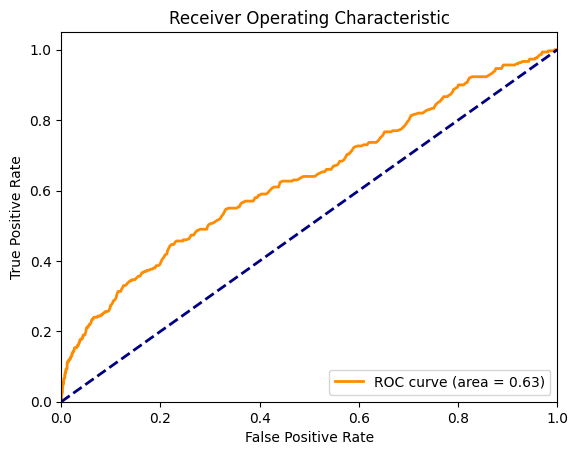

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv3D, GlobalAveragePooling3D, Dense, Dropout, Activation, BatchNormalization, ReLU
from tensorflow.keras.models import Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define the depthwise separable convolution block
def depthwise_separable_conv2d(input_tensor, pointwise_filters, strides=(1, 1)):
    channels = input_tensor.shape[-1]
    depthwise_conv = Conv2D(channels, kernel_size=(3, 3), strides=strides, padding='same', groups=channels)(input_tensor)
    x = BatchNormalization()(depthwise_conv)
    x = ReLU()(x)
    
    pointwise_conv = Conv2D(pointwise_filters, kernel_size=(1, 1), strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(pointwise_conv)
    x = ReLU()(x)
    return x

# Define the MobileNet model without the last layer
def create_mobilenet_base(input_shape):
    inputs = Input(shape=input_shape)

    # Initial convolution and pooling layer
    x = Conv2D(32, kernel_size=(3, 3), strides=(2, 2), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # MobileNet blocks
    x = depthwise_separable_conv2d(x, 64)
    x = depthwise_separable_conv2d(x, 128, strides=(2, 2))
    x = depthwise_separable_conv2d(x, 128)
    x = depthwise_separable_conv2d(x, 256, strides=(2, 2))
    x = depthwise_separable_conv2d(x, 256)
    x = depthwise_separable_conv2d(x, 512, strides=(2, 2))
    x = depthwise_separable_conv2d(x, 512)

    # Global pooling
    x = GlobalAveragePooling2D()(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create the MobileNet base model
mobilenet_base_model = create_mobilenet_base(input_shape=(100, 100, 1))

# Extract features
X_train_features = mobilenet_base_model.predict(X_train)
X_test_features = mobilenet_base_model.predict(X_test)

# Train Random Forest classifier
random_forest_classifier28 = RandomForestClassifier(n_estimators=2000, max_depth=30, random_state=42)
pipeline28 = Pipeline([
    ("scaler", StandardScaler()),
    ("random_forest_classifier", random_forest_classifier28)
])
pipeline28.fit(X_train_features, np.argmax(y_train, axis=1))


# Evaluate performance on training set
y_train_pred = pipeline28.predict(X_train_features)
train_accuracy = accuracy_score(np.argmax(y_train, axis=1), y_train_pred)
train_precision = precision_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_recall = recall_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_f1 = f1_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')

print("Training Accuracy:", train_accuracy*100,'%')
print("Training Precision:", train_precision*100,'%')
print("Training Recall:", train_recall*100,'%')
print("Training F1 Score:", train_f1*100,'%')

# Evaluate performance on testing set
y_test_pred = pipeline28.predict(X_test_features)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_test_pred)
test_precision = precision_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_recall = recall_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_f1 = f1_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')

print("Testing Accuracy:", test_accuracy*100,'%')
print("Testing Precision:", test_precision*100,'%')
print("Testing Recall:", test_recall*100,'%')
print("Testing F1 Score:", test_f1*100,'%')

# ROC curve
y_score = pipeline28.predict_proba(X_test_features)
fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())  # Flatten y_test and y_score
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [116]:
import joblib

model_path28 = "model_28/mobilenet_base_model.h5"
classifier_path28 = "model_28/random_forest_classifier28.pkl"

# Save the ResNet base model
mobilenet_base_model.save(model_path28)

# Save the SVM classifier
joblib.dump(pipeline28, classifier_path28)

['model_28/random_forest_classifier28.pkl']

38/38 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step
Training Accuracy: 100.0 %
Training Precision: 100.0 %
Training Recall: 100.0 %
Training F1 Score: 100.0 %


C:\Users\satvi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Testing Accuracy: 16.333333333333332 %
Testing Precision: 16.44875435636305 %
Testing Recall: 16.333333333333332 %
Testing F1 Score: 14.076249533830051 %


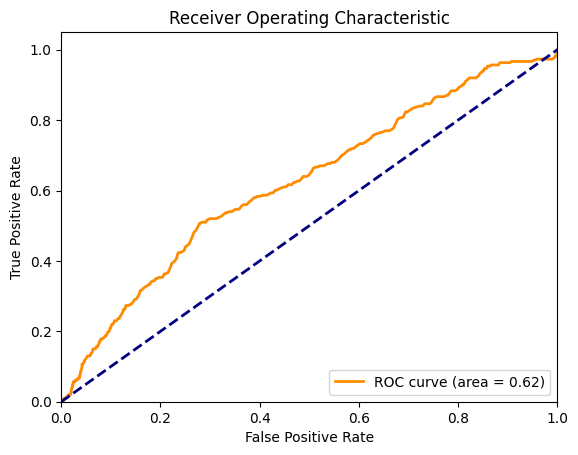

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv3D, GlobalAveragePooling3D, Dense, Dropout, Activation, BatchNormalization, ReLU
from tensorflow.keras.models import Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define the depthwise separable convolution block
def depthwise_separable_conv2d(input_tensor, pointwise_filters, strides=(1, 1)):
    channels = input_tensor.shape[-1]
    depthwise_conv = Conv2D(channels, kernel_size=(3, 3), strides=strides, padding='same', groups=channels)(input_tensor)
    x = BatchNormalization()(depthwise_conv)
    x = ReLU()(x)
    
    pointwise_conv = Conv2D(pointwise_filters, kernel_size=(1, 1), strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(pointwise_conv)
    x = ReLU()(x)
    return x

# Define the MobileNet model without the last layer
def create_mobilenet_base(input_shape):
    inputs = Input(shape=input_shape)

    # Initial convolution and pooling layer
    x = Conv2D(32, kernel_size=(3, 3), strides=(2, 2), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # MobileNet blocks
    x = depthwise_separable_conv2d(x, 64)
    x = depthwise_separable_conv2d(x, 128, strides=(2, 2))
    x = depthwise_separable_conv2d(x, 128)
    x = depthwise_separable_conv2d(x, 256, strides=(2, 2))
    x = depthwise_separable_conv2d(x, 256)
    x = depthwise_separable_conv2d(x, 512, strides=(2, 2))
    x = depthwise_separable_conv2d(x, 512)

    # Global pooling
    x = GlobalAveragePooling2D()(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Assume X_train, X_test, y_train, y_test are predefined
# Example data initialization
# X_train, X_test, y_train, y_test = train_test_split(...)

# Create the MobileNet base model
mobilenet_base_model = create_mobilenet_base(input_shape=(100, 100, 1))

# Extract features
X_train_features = mobilenet_base_model.predict(X_train)
X_test_features = mobilenet_base_model.predict(X_test)

# Train Random Forest classifier
random_forest_classifier29 = RandomForestClassifier(n_estimators=1500, max_depth=70, random_state=42)
pipeline29 = Pipeline([
    ("scaler", StandardScaler()),
    ("random_forest_classifier", random_forest_classifier29)
])
pipeline29.fit(X_train_features, np.argmax(y_train, axis=1))


# Evaluate performance on training set
y_train_pred = pipeline29.predict(X_train_features)
train_accuracy = accuracy_score(np.argmax(y_train, axis=1), y_train_pred)
train_precision = precision_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_recall = recall_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_f1 = f1_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')

print("Training Accuracy:", train_accuracy*100,'%')
print("Training Precision:", train_precision*100,'%')
print("Training Recall:", train_recall*100,'%')
print("Training F1 Score:", train_f1*100,'%')

# Evaluate performance on testing set
y_test_pred = pipeline29.predict(X_test_features)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_test_pred)
test_precision = precision_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_recall = recall_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_f1 = f1_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')

print("Testing Accuracy:", test_accuracy*100,'%')
print("Testing Precision:", test_precision*100,'%')
print("Testing Recall:", test_recall*100,'%')
print("Testing F1 Score:", test_f1*100,'%')

# ROC curve
y_score = pipeline29.predict_proba(X_test_features)
fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())  # Flatten y_test and y_score
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [118]:
import joblib

model_path29 = "model_29/mobilenet_base_model.h5"
classifier_path29 = "model_29/random_forest_classifier29.pkl"

# Save the ResNet base model
mobilenet_base_model.save(model_path29)

# Save the SVM classifier
joblib.dump(pipeline29, classifier_path29)

['model_29/random_forest_classifier29.pkl']

38/38 ━━━━━━━━━━━━━━━━━━━━ 98s 3s/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step
Training Accuracy: 100.0 %
Training Precision: 100.0 %
Training Recall: 100.0 %
Training F1 Score: 100.0 %
Testing Accuracy: 23.333333333333332 %
Testing Precision: 33.591438773059714 %
Testing Recall: 23.333333333333332 %
Testing F1 Score: 23.945906519245845 %


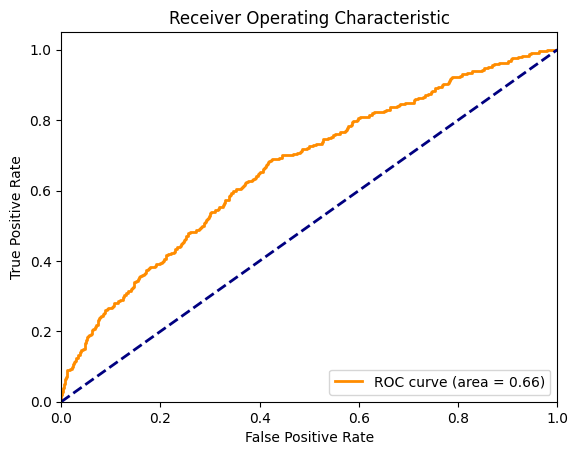

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv3D, GlobalAveragePooling3D, Dense, Dropout, Activation, BatchNormalization, ReLU
from tensorflow.keras.models import Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define the depthwise separable convolution block
def depthwise_separable_conv2d(input_tensor, pointwise_filters, strides=(1, 1)):
    channels = input_tensor.shape[-1]
    depthwise_conv = Conv2D(channels, kernel_size=(3, 3), strides=strides, padding='same', groups=channels)(input_tensor)
    x = BatchNormalization()(depthwise_conv)
    x = ReLU()(x)
    
    pointwise_conv = Conv2D(pointwise_filters, kernel_size=(1, 1), strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(pointwise_conv)
    x = ReLU()(x)
    return x

# Define the MobileNet model without the last layer
def create_mobilenet_base(input_shape):
    inputs = Input(shape=input_shape)

    # Initial convolution and pooling layer
    x = Conv2D(32, kernel_size=(3, 3), strides=(2, 2), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # MobileNet blocks
    x = depthwise_separable_conv2d(x, 64)
    x = depthwise_separable_conv2d(x, 128, strides=(2, 2))
    x = depthwise_separable_conv2d(x, 128)
    x = depthwise_separable_conv2d(x, 256, strides=(2, 2))
    x = depthwise_separable_conv2d(x, 256)
    x = depthwise_separable_conv2d(x, 512, strides=(2, 2))
    x = depthwise_separable_conv2d(x, 512)

    # Global pooling
    x = GlobalAveragePooling2D()(x)

    model = Model(inputs=inputs, outputs=x)
    return model


# Create the MobileNet base model
mobilenet_base_model = create_mobilenet_base(input_shape=(100, 100, 1))

# Extract features
X_train_features = mobilenet_base_model.predict(X_train)
X_test_features = mobilenet_base_model.predict(X_test)

# Train Random Forest classifier
random_forest_classifier30 = RandomForestClassifier(n_estimators=1800, max_depth=10, random_state=32)
pipeline30 = Pipeline([
    ("scaler", StandardScaler()),
    ("random_forest_classifier", random_forest_classifier30)
])
pipeline30.fit(X_train_features, np.argmax(y_train, axis=1))


# Evaluate performance on training set
y_train_pred = pipeline30.predict(X_train_features)
train_accuracy = accuracy_score(np.argmax(y_train, axis=1), y_train_pred)
train_precision = precision_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_recall = recall_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_f1 = f1_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')

print("Training Accuracy:", train_accuracy*100,'%')
print("Training Precision:", train_precision*100,'%')
print("Training Recall:", train_recall*100,'%')
print("Training F1 Score:", train_f1*100,'%')

# Evaluate performance on testing set
y_test_pred = pipeline30.predict(X_test_features)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_test_pred)
test_precision = precision_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_recall = recall_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_f1 = f1_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')

print("Testing Accuracy:", test_accuracy*100,'%')
print("Testing Precision:", test_precision*100,'%')
print("Testing Recall:", test_recall*100,'%')
print("Testing F1 Score:", test_f1*100,'%')

# ROC curve
y_score = pipeline30.predict_proba(X_test_features)
fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())  # Flatten y_test and y_score
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [120]:
import joblib

model_path30 = "model_30/mobilenet_base_model.h5"
classifier_path30 = "model_30/random_forest_classifier30.pkl"

# Save the ResNet base model
mobilenet_base_model.save(model_path30)

# Save the SVM classifier
joblib.dump(pipeline30, classifier_path30)

['model_30/random_forest_classifier30.pkl']

## Mobile Net+Ada Boost

38/38 ━━━━━━━━━━━━━━━━━━━━ 99s 3s/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step


C:\Users\satvi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\satvi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training Accuracy: 19.583333333333332 %
Training Precision: 7.452864523793934 %
Training Recall: 19.583333333333332 %
Training F1 Score: 10.431096481213219 %
Testing Accuracy: 13.333333333333334 %
Testing Precision: 5.606923076923077 %
Testing Recall: 13.333333333333334 %
Testing F1 Score: 6.030244403206064 %


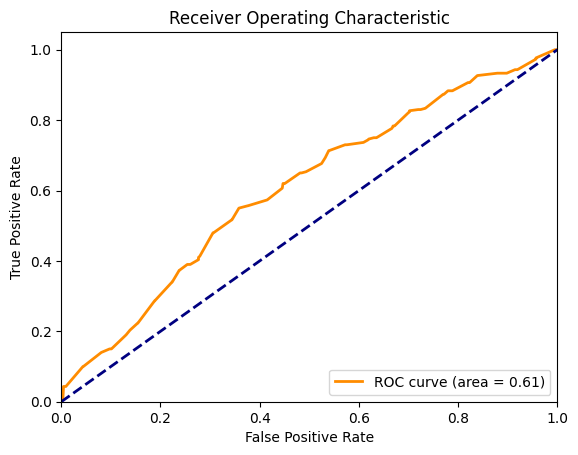

['model_31/adaboost_classifier31.pkl']

In [121]:
from tensorflow.keras.layers import Input, Conv3D, GlobalAveragePooling3D, Dense, Dropout, Activation, BatchNormalization, ReLU
from tensorflow.keras.models import Model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define the depthwise separable convolution block
def depthwise_separable_conv2d(input_tensor, pointwise_filters, strides=(1, 1)):
    channels = input_tensor.shape[-1]
    depthwise_conv = Conv2D(channels, kernel_size=(3, 3), strides=strides, padding='same', groups=channels)(input_tensor)
    x = BatchNormalization()(depthwise_conv)
    x = ReLU()(x)
    
    pointwise_conv = Conv2D(pointwise_filters, kernel_size=(1, 1), strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(pointwise_conv)
    x = ReLU()(x)
    return x

# Define the MobileNet model without the last layer
def create_mobilenet_base(input_shape):
    inputs = Input(shape=input_shape)

    # Initial convolution and pooling layer
    x = Conv2D(32, kernel_size=(3, 3), strides=(2, 2), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # MobileNet blocks
    x = depthwise_separable_conv2d(x, 64)
    x = depthwise_separable_conv2d(x, 128, strides=(2, 2))
    x = depthwise_separable_conv2d(x, 128)
    x = depthwise_separable_conv2d(x, 256, strides=(2, 2))
    x = depthwise_separable_conv2d(x, 256)
    x = depthwise_separable_conv2d(x, 512, strides=(2, 2))
    x = depthwise_separable_conv2d(x, 512)

    # Global pooling
    x = GlobalAveragePooling2D()(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create the MobileNet base model
mobilenet_base_model = create_mobilenet_base(input_shape=(100, 100, 1))
# Extract features
X_train_features = mobilenet_base_model.predict(X_train)
X_test_features = mobilenet_base_model.predict(X_test)

# Train AdaBoost classifier
adaboost_classifier31 = AdaBoostClassifier(n_estimators=200, learning_rate=0.001)
pipeline31 = Pipeline([
    ("scaler", StandardScaler()),
    ("adaboost_classifier", adaboost_classifier31)
])
pipeline31.fit(X_train_features, np.argmax(y_train, axis=1))


# Evaluate performance on training set
y_train_pred = pipeline31.predict(X_train_features)
train_accuracy = accuracy_score(np.argmax(y_train, axis=1), y_train_pred)
train_precision = precision_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_recall = recall_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_f1 = f1_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')

print("Training Accuracy:", train_accuracy*100,'%')
print("Training Precision:", train_precision*100,'%')
print("Training Recall:", train_recall*100,'%')
print("Training F1 Score:", train_f1*100,'%')

# Evaluate performance on testing set
y_test_pred = pipeline31.predict(X_test_features)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_test_pred)
test_precision = precision_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_recall = recall_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_f1 = f1_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')

print("Testing Accuracy:", test_accuracy*100,'%')
print("Testing Precision:", test_precision*100,'%')
print("Testing Recall:", test_recall*100,'%')
print("Testing F1 Score:", test_f1*100,'%')

# ROC curve
y_score = pipeline31.predict_proba(X_test_features)
fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())  # Flatten y_test and y_score
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

import joblib

model_path31 = "model_31/mobilenet_base_model.h5"
classifier_path31 = "model_31/adaboost_classifier31.pkl"

# Save the ResNet base model
mobilenet_base_model.save(model_path31)

# Save the SVM classifier
joblib.dump(pipeline31, classifier_path31)

38/38 ━━━━━━━━━━━━━━━━━━━━ 99s 3s/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step
Training Accuracy: 26.75 %
Training Precision: 31.267019495491272 %
Training Recall: 26.75 %
Training F1 Score: 25.217160822102123 %


C:\Users\satvi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Testing Accuracy: 13.0 %
Testing Precision: 6.939716312056738 %
Testing Recall: 13.0 %
Testing F1 Score: 6.04634823502748 %


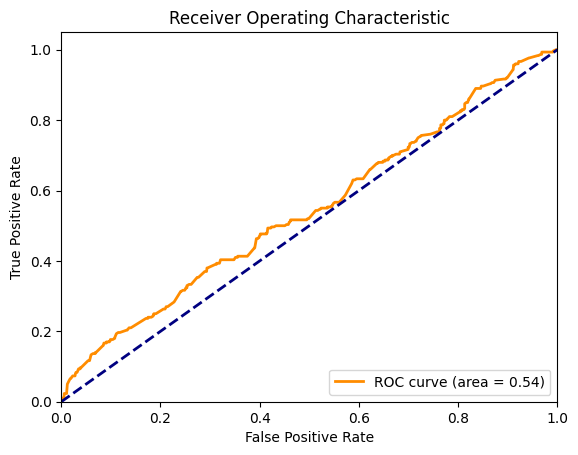

['model_32/adaboost_classifier32.pkl']

In [122]:
from tensorflow.keras.layers import Input, Conv3D, GlobalAveragePooling3D, Dense, Dropout, Activation, BatchNormalization, ReLU
from tensorflow.keras.models import Model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define the depthwise separable convolution block
def depthwise_separable_conv2d(input_tensor, pointwise_filters, strides=(1, 1)):
    channels = input_tensor.shape[-1]
    depthwise_conv = Conv2D(channels, kernel_size=(3, 3), strides=strides, padding='same', groups=channels)(input_tensor)
    x = BatchNormalization()(depthwise_conv)
    x = ReLU()(x)
    
    pointwise_conv = Conv2D(pointwise_filters, kernel_size=(1, 1), strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(pointwise_conv)
    x = ReLU()(x)
    return x

# Define the MobileNet model without the last layer
def create_mobilenet_base(input_shape):
    inputs = Input(shape=input_shape)

    # Initial convolution and pooling layer
    x = Conv2D(32, kernel_size=(3, 3), strides=(2, 2), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # MobileNet blocks
    x = depthwise_separable_conv2d(x, 64)
    x = depthwise_separable_conv2d(x, 128, strides=(2, 2))
    x = depthwise_separable_conv2d(x, 128)
    x = depthwise_separable_conv2d(x, 256, strides=(2, 2))
    x = depthwise_separable_conv2d(x, 256)
    x = depthwise_separable_conv2d(x, 512, strides=(2, 2))
    x = depthwise_separable_conv2d(x, 512)

    # Global pooling
    x = GlobalAveragePooling2D()(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create the MobileNet base model
mobilenet_base_model = create_mobilenet_base(input_shape=(100, 100, 1))
# Extract features
X_train_features = mobilenet_base_model.predict(X_train)
X_test_features = mobilenet_base_model.predict(X_test)

# Train AdaBoost classifier
adaboost_classifier32 = AdaBoostClassifier(n_estimators=200, learning_rate=0.005)
pipeline32 = Pipeline([
    ("scaler", StandardScaler()),
    ("adaboost_classifier", adaboost_classifier32)
])
pipeline32.fit(X_train_features, np.argmax(y_train, axis=1))


# Evaluate performance on training set
y_train_pred = pipeline32.predict(X_train_features)
train_accuracy = accuracy_score(np.argmax(y_train, axis=1), y_train_pred)
train_precision = precision_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_recall = recall_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_f1 = f1_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')

print("Training Accuracy:", train_accuracy*100,'%')
print("Training Precision:", train_precision*100,'%')
print("Training Recall:", train_recall*100,'%')
print("Training F1 Score:", train_f1*100,'%')

# Evaluate performance on testing set
y_test_pred = pipeline32.predict(X_test_features)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_test_pred)
test_precision = precision_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_recall = recall_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_f1 = f1_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')

print("Testing Accuracy:", test_accuracy*100,'%')
print("Testing Precision:", test_precision*100,'%')
print("Testing Recall:", test_recall*100,'%')
print("Testing F1 Score:", test_f1*100,'%')

# ROC curve
y_score = pipeline32.predict_proba(X_test_features)
fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())  # Flatten y_test and y_score
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

import joblib

model_path32 = "model_32/mobilenet_base_model.h5"
classifier_path32 = "model_32/adaboost_classifier32.pkl"

# Save the ResNet base model
mobilenet_base_model.save(model_path32)

# Save the SVM classifier
joblib.dump(pipeline32, classifier_path32)

## Mobile Net+SVM

38/38 ━━━━━━━━━━━━━━━━━━━━ 100s 3s/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step
Training Accuracy: 100.0 %
Training Precision: 100.0 %
Training Recall: 100.0 %
Training F1 Score: 100.0 %
Testing Accuracy: 24.0 %
Testing Precision: 33.34652329230802 %
Testing Recall: 24.0 %
Testing F1 Score: 20.5953081937825 %


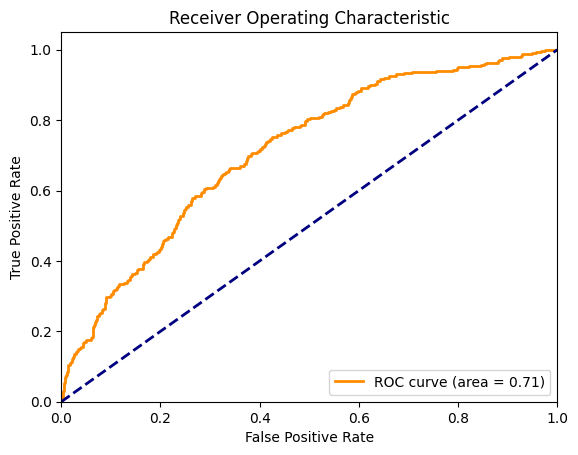

['model_33/svm_classifier33.pkl']

In [124]:
from tensorflow.keras.layers import Input, Conv3D, GlobalAveragePooling3D, Dense, Dropout, Activation, BatchNormalization, ReLU
from tensorflow.keras.models import Model
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define the depthwise separable convolution block
def depthwise_separable_conv2d(input_tensor, pointwise_filters, strides=(1, 1)):
    channels = input_tensor.shape[-1]
    depthwise_conv = Conv2D(channels, kernel_size=(3, 3), strides=strides, padding='same', groups=channels)(input_tensor)
    x = BatchNormalization()(depthwise_conv)
    x = ReLU()(x)
    
    pointwise_conv = Conv2D(pointwise_filters, kernel_size=(1, 1), strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(pointwise_conv)
    x = ReLU()(x)
    return x

# Define the MobileNet model without the last layer
def create_mobilenet_base(input_shape):
    inputs = Input(shape=input_shape)

    # Initial convolution and pooling layer
    x = Conv2D(32, kernel_size=(3, 3), strides=(2, 2), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # MobileNet blocks
    x = depthwise_separable_conv2d(x, 64)
    x = depthwise_separable_conv2d(x, 128, strides=(2, 2))
    x = depthwise_separable_conv2d(x, 128)
    x = depthwise_separable_conv2d(x, 256, strides=(2, 2))
    x = depthwise_separable_conv2d(x, 256)
    x = depthwise_separable_conv2d(x, 512, strides=(2, 2))
    x = depthwise_separable_conv2d(x, 512)

    # Global pooling
    x = GlobalAveragePooling2D()(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create the MobileNet base model
mobilenet_base_model = create_mobilenet_base(input_shape=(100, 100, 1))

# Extract features
X_train_features = mobilenet_base_model.predict(X_train)
X_test_features = mobilenet_base_model.predict(X_test)

# Train SVM classifier
svm_classifier33 = SVC(kernel='linear', C=1.0)
pipeline33 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_classifier", svm_classifier33)
])
pipeline33.fit(X_train_features, np.argmax(y_train, axis=1))


# Evaluate performance on training set
y_train_pred = pipeline33.predict(X_train_features)
train_accuracy = accuracy_score(np.argmax(y_train, axis=1), y_train_pred)
train_precision = precision_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_recall = recall_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_f1 = f1_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')

print("Training Accuracy:", train_accuracy*100,'%')
print("Training Precision:", train_precision*100,'%')
print("Training Recall:", train_recall*100,'%')
print("Training F1 Score:", train_f1*100,'%')

# Evaluate performance on testing set
y_test_pred = pipeline33.predict(X_test_features)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_test_pred)
test_precision = precision_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_recall = recall_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_f1 = f1_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')

print("Testing Accuracy:", test_accuracy*100,'%')
print("Testing Precision:", test_precision*100,'%')
print("Testing Recall:", test_recall*100,'%')
print("Testing F1 Score:", test_f1*100,'%')

# ROC curve
y_score = pipeline33.decision_function(X_test_features)
fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())  # Flatten y_test and y_score
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

import joblib

model_path33 = "model_33/mobilenet_base_model.h5"
classifier_path33 = "model_33/svm_classifier33.pkl"

# Save the ResNet base model
mobilenet_base_model.save(model_path33)

# Save the SVM classifier
joblib.dump(pipeline33, classifier_path33)

38/38 ━━━━━━━━━━━━━━━━━━━━ 98s 3s/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step
Training Accuracy: 88.75 %
Training Precision: 88.94638098280393 %
Training Recall: 88.75 %
Training F1 Score: 88.7539622733221 %
Testing Accuracy: 15.0 %
Testing Precision: 26.55568357396771 %
Testing Recall: 15.0 %
Testing F1 Score: 13.065494598331902 %


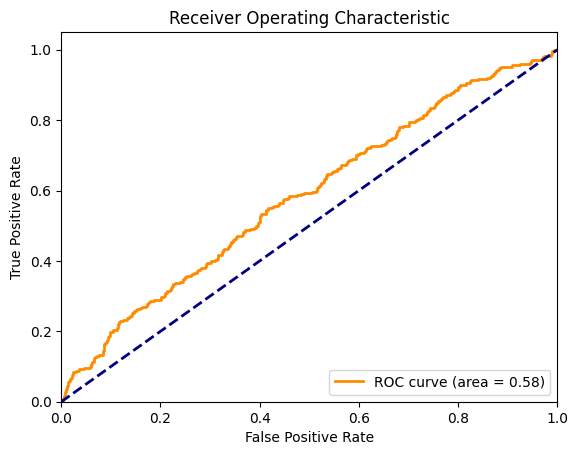

['model_34/svm_classifier34.pkl']

In [125]:
from tensorflow.keras.layers import Input, Conv3D, GlobalAveragePooling3D, Dense, Dropout, Activation, BatchNormalization, ReLU
from tensorflow.keras.models import Model
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define the depthwise separable convolution block
def depthwise_separable_conv2d(input_tensor, pointwise_filters, strides=(1, 1)):
    channels = input_tensor.shape[-1]
    depthwise_conv = Conv2D(channels, kernel_size=(3, 3), strides=strides, padding='same', groups=channels)(input_tensor)
    x = BatchNormalization()(depthwise_conv)
    x = ReLU()(x)
    
    pointwise_conv = Conv2D(pointwise_filters, kernel_size=(1, 1), strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(pointwise_conv)
    x = ReLU()(x)
    return x

# Define the MobileNet model without the last layer
def create_mobilenet_base(input_shape):
    inputs = Input(shape=input_shape)

    # Initial convolution and pooling layer
    x = Conv2D(32, kernel_size=(3, 3), strides=(2, 2), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # MobileNet blocks
    x = depthwise_separable_conv2d(x, 64)
    x = depthwise_separable_conv2d(x, 128, strides=(2, 2))
    x = depthwise_separable_conv2d(x, 128)
    x = depthwise_separable_conv2d(x, 256, strides=(2, 2))
    x = depthwise_separable_conv2d(x, 256)
    x = depthwise_separable_conv2d(x, 512, strides=(2, 2))
    x = depthwise_separable_conv2d(x, 512)

    # Global pooling
    x = GlobalAveragePooling2D()(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create the MobileNet base model
mobilenet_base_model = create_mobilenet_base(input_shape=(100, 100, 1))

# Extract features
X_train_features = mobilenet_base_model.predict(X_train)
X_test_features = mobilenet_base_model.predict(X_test)

# Train SVM classifier
svm_classifier34 = SVC(kernel='rbf', C=1.0)
pipeline34 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_classifier", svm_classifier34)
])
pipeline34.fit(X_train_features, np.argmax(y_train, axis=1))


# Evaluate performance on training set
y_train_pred = pipeline34.predict(X_train_features)
train_accuracy = accuracy_score(np.argmax(y_train, axis=1), y_train_pred)
train_precision = precision_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_recall = recall_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_f1 = f1_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')

print("Training Accuracy:", train_accuracy*100,'%')
print("Training Precision:", train_precision*100,'%')
print("Training Recall:", train_recall*100,'%')
print("Training F1 Score:", train_f1*100,'%')

# Evaluate performance on testing set
y_test_pred = pipeline34.predict(X_test_features)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_test_pred)
test_precision = precision_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_recall = recall_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_f1 = f1_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')

print("Testing Accuracy:", test_accuracy*100,'%')
print("Testing Precision:", test_precision*100,'%')
print("Testing Recall:", test_recall*100,'%')
print("Testing F1 Score:", test_f1*100,'%')

# ROC curve
y_score = pipeline34.decision_function(X_test_features)
fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())  # Flatten y_test and y_score
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


import joblib

model_path34 = "model_34/mobilenet_base_model.h5"
classifier_path34 = "model_34/svm_classifier34.pkl"

# Save the ResNet base model
mobilenet_base_model.save(model_path34)

# Save the SVM classifier
joblib.dump(pipeline34, classifier_path34)

38/38 ━━━━━━━━━━━━━━━━━━━━ 100s 3s/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step
Training Accuracy: 42.0 %
Training Precision: 91.4705882352941 %
Training Recall: 42.0 %
Training F1 Score: 49.67906197231025 %
Testing Accuracy: 8.666666666666668 %
Testing Precision: 9.349940544955206 %
Testing Recall: 8.666666666666668 %
Testing F1 Score: 7.673593585593255 %


C:\Users\satvi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


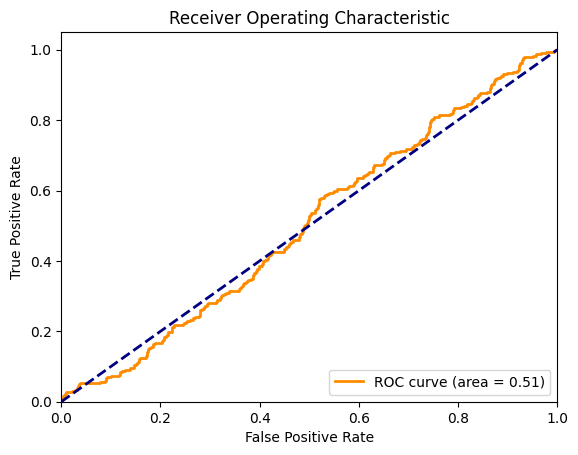

['model_35/svm_classifier35.pkl']

In [126]:
from tensorflow.keras.layers import Input, Conv3D, GlobalAveragePooling3D, Dense, Dropout, Activation, BatchNormalization, ReLU
from tensorflow.keras.models import Model
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define the depthwise separable convolution block
def depthwise_separable_conv2d(input_tensor, pointwise_filters, strides=(1, 1)):
    channels = input_tensor.shape[-1]
    depthwise_conv = Conv2D(channels, kernel_size=(3, 3), strides=strides, padding='same', groups=channels)(input_tensor)
    x = BatchNormalization()(depthwise_conv)
    x = ReLU()(x)
    
    pointwise_conv = Conv2D(pointwise_filters, kernel_size=(1, 1), strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(pointwise_conv)
    x = ReLU()(x)
    return x

# Define the MobileNet model without the last layer
def create_mobilenet_base(input_shape):
    inputs = Input(shape=input_shape)

    # Initial convolution and pooling layer
    x = Conv2D(32, kernel_size=(3, 3), strides=(2, 2), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # MobileNet blocks
    x = depthwise_separable_conv2d(x, 64)
    x = depthwise_separable_conv2d(x, 128, strides=(2, 2))
    x = depthwise_separable_conv2d(x, 128)
    x = depthwise_separable_conv2d(x, 256, strides=(2, 2))
    x = depthwise_separable_conv2d(x, 256)
    x = depthwise_separable_conv2d(x, 512, strides=(2, 2))
    x = depthwise_separable_conv2d(x, 512)

    # Global pooling
    x = GlobalAveragePooling2D()(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create the MobileNet base model
mobilenet_base_model = create_mobilenet_base(input_shape=(100, 100, 1))

# Extract features
X_train_features = mobilenet_base_model.predict(X_train)
X_test_features = mobilenet_base_model.predict(X_test)

# Train SVM classifier
svm_classifier35 = SVC(kernel='poly', degree=15)
pipeline35 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_classifier", svm_classifier35)
])
pipeline35.fit(X_train_features, np.argmax(y_train, axis=1))


# Evaluate performance on training set
y_train_pred = pipeline35.predict(X_train_features)
train_accuracy = accuracy_score(np.argmax(y_train, axis=1), y_train_pred)
train_precision = precision_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_recall = recall_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_f1 = f1_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')

print("Training Accuracy:", train_accuracy*100,'%')
print("Training Precision:", train_precision*100,'%')
print("Training Recall:", train_recall*100,'%')
print("Training F1 Score:", train_f1*100,'%')

# Evaluate performance on testing set
y_test_pred = pipeline35.predict(X_test_features)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_test_pred)
test_precision = precision_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_recall = recall_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_f1 = f1_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')

print("Testing Accuracy:", test_accuracy*100,'%')
print("Testing Precision:", test_precision*100,'%')
print("Testing Recall:", test_recall*100,'%')
print("Testing F1 Score:", test_f1*100,'%')

# ROC curve
y_score = pipeline35.decision_function(X_test_features)
fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())  # Flatten y_test and y_score
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


import joblib

model_path35 = "model_35/mobilenet_base_model.h5"
classifier_path35 = "model_35/svm_classifier35.pkl"

# Save the ResNet base model
mobilenet_base_model.save(model_path35)

# Save the SVM classifier
joblib.dump(pipeline35, classifier_path35)

## Mobile Net+KNN

38/38 ━━━━━━━━━━━━━━━━━━━━ 98s 3s/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step
Training Accuracy: 78.58333333333334 %
Training Precision: 80.86524922029598 %
Training Recall: 78.58333333333334 %
Training F1 Score: 78.62331793661203 %
Testing Accuracy: 12.333333333333334 %
Testing Precision: 18.633885743331025 %
Testing Recall: 12.333333333333334 %
Testing F1 Score: 13.945596834686402 %


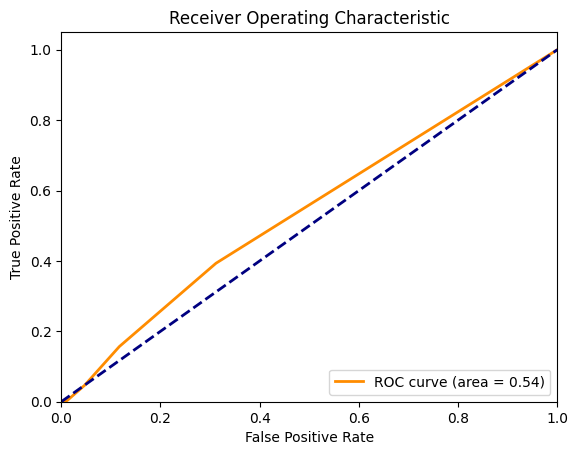

['model_36/knn_classifier36.pkl']

In [127]:
from tensorflow.keras.layers import Input, Conv3D, GlobalAveragePooling3D, Dense, Dropout, Activation, BatchNormalization, ReLU
from tensorflow.keras.models import Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define the depthwise separable convolution block
def depthwise_separable_conv2d(input_tensor, pointwise_filters, strides=(1, 1)):
    channels = input_tensor.shape[-1]
    depthwise_conv = Conv2D(channels, kernel_size=(3, 3), strides=strides, padding='same', groups=channels)(input_tensor)
    x = BatchNormalization()(depthwise_conv)
    x = ReLU()(x)
    
    pointwise_conv = Conv2D(pointwise_filters, kernel_size=(1, 1), strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(pointwise_conv)
    x = ReLU()(x)
    return x

# Define the MobileNet model without the last layer
def create_mobilenet_base(input_shape):
    inputs = Input(shape=input_shape)

    # Initial convolution and pooling layer
    x = Conv2D(32, kernel_size=(3, 3), strides=(2, 2), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # MobileNet blocks
    x = depthwise_separable_conv2d(x, 64)
    x = depthwise_separable_conv2d(x, 128, strides=(2, 2))
    x = depthwise_separable_conv2d(x, 128)
    x = depthwise_separable_conv2d(x, 256, strides=(2, 2))
    x = depthwise_separable_conv2d(x, 256)
    x = depthwise_separable_conv2d(x, 512, strides=(2, 2))
    x = depthwise_separable_conv2d(x, 512)

    # Global pooling
    x = GlobalAveragePooling2D()(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create the MobileNet base model
mobilenet_base_model = create_mobilenet_base(input_shape=(100, 100, 1))

# Extract features
X_train_features = mobilenet_base_model.predict(X_train)
X_test_features = mobilenet_base_model.predict(X_test)

# Train k-NN classifier
knn_classifier36 = KNeighborsClassifier(n_neighbors=5)
pipeline36 = Pipeline([
    ("scaler", StandardScaler()),
    ("knn_classifier", knn_classifier36)
])
pipeline36.fit(X_train_features, np.argmax(y_train, axis=1))


# Evaluate performance on training set
y_train_pred = pipeline36.predict(X_train_features)
train_accuracy = accuracy_score(np.argmax(y_train, axis=1), y_train_pred)
train_precision = precision_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_recall = recall_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_f1 = f1_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')

print("Training Accuracy:", train_accuracy*100,'%')
print("Training Precision:", train_precision*100,'%')
print("Training Recall:", train_recall*100,'%')
print("Training F1 Score:", train_f1*100,'%')

# Evaluate performance on testing set
y_test_pred = pipeline36.predict(X_test_features)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_test_pred)
test_precision = precision_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_recall = recall_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_f1 = f1_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')

print("Testing Accuracy:", test_accuracy*100,'%')
print("Testing Precision:", test_precision*100,'%')
print("Testing Recall:", test_recall*100,'%')
print("Testing F1 Score:", test_f1*100,'%')

# ROC curve
y_score = pipeline36.predict_proba(X_test_features)
fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())  # Flatten y_test and y_score
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

import joblib

model_path36 = "model_36/mobilenet_base_model.h5"
classifier_path36 = "model_36/knn_classifier36.pkl"

# Save the ResNet base model
mobilenet_base_model.save(model_path36)

# Save the SVM classifier
joblib.dump(pipeline36, classifier_path36)

38/38 ━━━━━━━━━━━━━━━━━━━━ 96s 3s/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step
Training Accuracy: 67.08333333333333 %
Training Precision: 70.01987664794376 %
Training Recall: 67.08333333333333 %
Training F1 Score: 67.07284595852397 %
Testing Accuracy: 9.0 %
Testing Precision: 18.51604628966834 %
Testing Recall: 9.0 %
Testing F1 Score: 7.1551088236232046 %


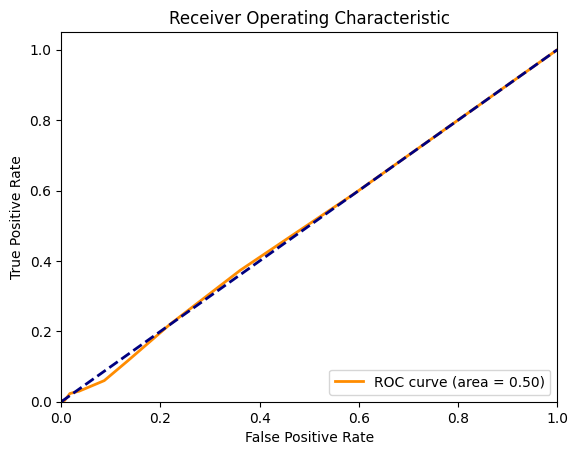

['model_37/knn_classifier37.pkl']

In [128]:
from tensorflow.keras.layers import Input, Conv3D, GlobalAveragePooling3D, Dense, Dropout, Activation, BatchNormalization, ReLU
from tensorflow.keras.models import Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define the depthwise separable convolution block
def depthwise_separable_conv2d(input_tensor, pointwise_filters, strides=(1, 1)):
    channels = input_tensor.shape[-1]
    depthwise_conv = Conv2D(channels, kernel_size=(3, 3), strides=strides, padding='same', groups=channels)(input_tensor)
    x = BatchNormalization()(depthwise_conv)
    x = ReLU()(x)
    
    pointwise_conv = Conv2D(pointwise_filters, kernel_size=(1, 1), strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(pointwise_conv)
    x = ReLU()(x)
    return x

# Define the MobileNet model without the last layer
def create_mobilenet_base(input_shape):
    inputs = Input(shape=input_shape)

    # Initial convolution and pooling layer
    x = Conv2D(32, kernel_size=(3, 3), strides=(2, 2), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # MobileNet blocks
    x = depthwise_separable_conv2d(x, 64)
    x = depthwise_separable_conv2d(x, 128, strides=(2, 2))
    x = depthwise_separable_conv2d(x, 128)
    x = depthwise_separable_conv2d(x, 256, strides=(2, 2))
    x = depthwise_separable_conv2d(x, 256)
    x = depthwise_separable_conv2d(x, 512, strides=(2, 2))
    x = depthwise_separable_conv2d(x, 512)

    # Global pooling
    x = GlobalAveragePooling2D()(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create the MobileNet base model
mobilenet_base_model = create_mobilenet_base(input_shape=(100, 100, 1))

# Extract features
X_train_features = mobilenet_base_model.predict(X_train)
X_test_features = mobilenet_base_model.predict(X_test)

# Train k-NN classifier
knn_classifier37 = KNeighborsClassifier(n_neighbors=15)
pipeline37 = Pipeline([
    ("scaler", StandardScaler()),
    ("knn_classifier", knn_classifier37)
])
pipeline37.fit(X_train_features, np.argmax(y_train, axis=1))


# Evaluate performance on training set
y_train_pred = pipeline37.predict(X_train_features)
train_accuracy = accuracy_score(np.argmax(y_train, axis=1), y_train_pred)
train_precision = precision_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_recall = recall_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_f1 = f1_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')

print("Training Accuracy:", train_accuracy*100,'%')
print("Training Precision:", train_precision*100,'%')
print("Training Recall:", train_recall*100,'%')
print("Training F1 Score:", train_f1*100,'%')

# Evaluate performance on testing set
y_test_pred = pipeline37.predict(X_test_features)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_test_pred)
test_precision = precision_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_recall = recall_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_f1 = f1_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')

print("Testing Accuracy:", test_accuracy*100,'%')
print("Testing Precision:", test_precision*100,'%')
print("Testing Recall:", test_recall*100,'%')
print("Testing F1 Score:", test_f1*100,'%')

# ROC curve
y_score = pipeline37.predict_proba(X_test_features)
fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())  # Flatten y_test and y_score
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

import joblib

model_path37 = "model_37/mobilenet_base_model.h5"
classifier_path37 = "model_37/knn_classifier37.pkl"

# Save the ResNet base model
mobilenet_base_model.save(model_path37)

# Save the SVM classifier
joblib.dump(pipeline37, classifier_path37)

## CNN

In [130]:
import tensorflow as tf
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout, Input, Activation
from tensorflow.keras.models import Model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# Define the CNN block
def cnn_block(input_tensor, filters, kernel_size=(3, 3), strides=(1, 1)):
    x = Conv2D(filters, kernel_size=kernel_size, strides=strides, padding='same')(input_tensor)
    x = Activation('relu')(x)
    return x

# Define the CNN model
def create_cnn(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, (7, 7), strides=2, activation='relu', padding='same')(inputs)
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Convolutional blocks
    x = cnn_block(x, filters=64)
    x = cnn_block(x, filters=64)
    x = MaxPooling2D(pool_size=(2, 2), strides=2, padding='same')(x)
    
    x = cnn_block(x, filters=128)
    x = cnn_block(x, filters=128)
    x = MaxPooling2D(pool_size=(2, 2), strides=2, padding='same')(x)
    
    x = cnn_block(x, filters=256)
    x = cnn_block(x, filters=256)
    x = MaxPooling2D(pool_size=(2, 2), strides=2, padding='same')(x)
    
    x = cnn_block(x, filters=512)
    x = cnn_block(x, filters=512)
    x = MaxPooling2D(pool_size=(2, 2), strides=2, padding='same')(x)

    x = Flatten()(x)
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(2048, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Create the CNN model
cnn_model = create_cnn(input_shape=(100, 100, 1), num_classes=10)

# Compile the model
cnn_model.compile(loss='categorical_crossentropy', optimizer='Adagrad', metrics=['accuracy'])

# Print model summary
cnn_model.summary()

cnn = "cnn/cnn_model.h5"
# Save the ResNet base model
cnn_model.save(cnn)

Model: "functional_119"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_66 (InputLayer)          │ (None, 100, 100, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_916 (Conv2D)                  │ (None, 50, 50, 64)          │           3,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_136 (MaxPooling2D)     │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_917 (Conv2D)                  │ (None, 25, 25, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_345 (Activation)          │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_918 (Conv2D)                  │ (None, 25, 25, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_346 (Activation)          │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_137 (MaxPooling2D)     │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_919 (Conv2D)                  │ (None, 13, 13, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_347 (Activation)          │ (None, 13, 13, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_920 (Conv2D)                  │ (None, 13, 13, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_348 (Activation)          │ (None, 13, 13, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_138 (MaxPooling2D)     │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_921 (Conv2D)                  │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_349 (Activation)          │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_922 (Conv2D)                  │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_350 (Activation)          │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_139 (MaxPooling2D)     │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_923 (Conv2D)                  │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_351 (Activation)          │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_924 (Conv2D)                  │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 23,615,498 (90.09 MB)

 Trainable params: 23,615,498 (90.09 MB)

 Non-trainable params: 0 (0.00 B)

In [133]:
t1 = time.time()
history = cnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)
t2 = time.time()
print()
print(f"Training time : {t2 - t1} secs.")

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 18s 396ms/step - accuracy: 0.0867 - loss: 2.3028 - val_accuracy: 0.1133 - val_loss: 2.3026
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 14s 379ms/step - accuracy: 0.1068 - loss: 2.3026 - val_accuracy: 0.1067 - val_loss: 2.3025
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 16s 422ms/step - accuracy: 0.0970 - loss: 2.3027 - val_accuracy: 0.0833 - val_loss: 2.3025
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 16s 424ms/step - accuracy: 0.1056 - loss: 2.3025 - val_accuracy: 0.1000 - val_loss: 2.3025
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 15s 383ms/step - accuracy: 0.1143 - loss: 2.3023 - val_accuracy: 0.1200 - val_loss: 2.3025
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 14s 356ms/step - accuracy: 0.1055 - loss: 2.3029 - val_accuracy: 0.1233 - val_loss: 2.3025
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 14s 359ms/step - accuracy: 0.1004 - loss: 2.3024 - val_accuracy: 0.1267 - val_loss: 2.3025
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 14s 379ms/step - accuracy: 0.1110 - loss: 2.3025 - val_accu

## CNN+Ada Boost

38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step
Training Accuracy: 30.5 %
Training Precision: 31.578993316749486 %
Training Recall: 30.5 %
Training F1 Score: 30.613404596819578 %
Accuracy: 12.333333333333334 %
Precision: 12.461553971957889 %
Recall: 12.333333333333334 %
F1 Score: 11.12668436584988 %


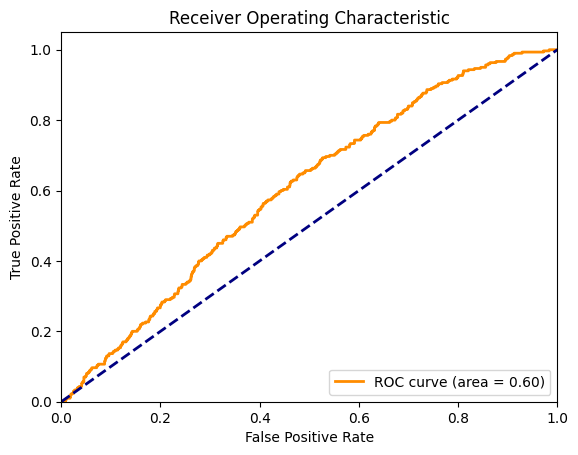

['model_38/adaboost_classifier.pkl']

In [137]:
# Extract features
X_train_features = cnn_model.predict(X_train)
X_test_features = cnn_model.predict(X_test)

# Train AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(n_estimators=120, learning_rate=0.5)
pipeline38 = Pipeline([
    ("scaler", StandardScaler()),
    ("adaboost_classifier", adaboost_classifier)
])
pipeline38.fit(X_train_features, np.argmax(y_train, axis=1))

# Evaluate performance on training set
y_train_pred = pipeline38.predict(X_train_features)
train_accuracy = accuracy_score(np.argmax(y_train, axis=1), y_train_pred)
train_precision = precision_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_recall = recall_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_f1 = f1_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')

print("Training Accuracy:", train_accuracy*100,'%')
print("Training Precision:", train_precision*100,'%')
print("Training Recall:", train_recall*100,'%')
print("Training F1 Score:", train_f1*100,'%')

# Evaluate performance
y_pred = pipeline38.predict(X_test_features)
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
precision = precision_score(np.argmax(y_test, axis=1), y_pred, average='weighted')
recall = recall_score(np.argmax(y_test, axis=1), y_pred, average='weighted')
f1 = f1_score(np.argmax(y_test, axis=1), y_pred, average='weighted')

print("Accuracy:", accuracy*100,'%')
print("Precision:", precision*100,'%')
print("Recall:", recall*100,'%')
print("F1 Score:", f1*100,'%')

# ROC curve
y_score = pipeline38.predict_proba(X_test_features)
fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())  # Using probability estimates for the positive class
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

import joblib

model_path38 = "model_38/cnn_model.h5"
classifier_path38 = "model_38/adaboost_classifier.pkl"

# Save the ResNet base model
#cnn_model.save(model_path38)

# Save the SVM classifier
joblib.dump(pipeline38, classifier_path38)